In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import os
import glob
from sklearn import linear_model
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/export?bbox=-119.0,33.0,-117.0,34.0&bboxSR=4326&imageSR=4326&size=1000,500&dpi=96&format=png32&transparent=true&f=image


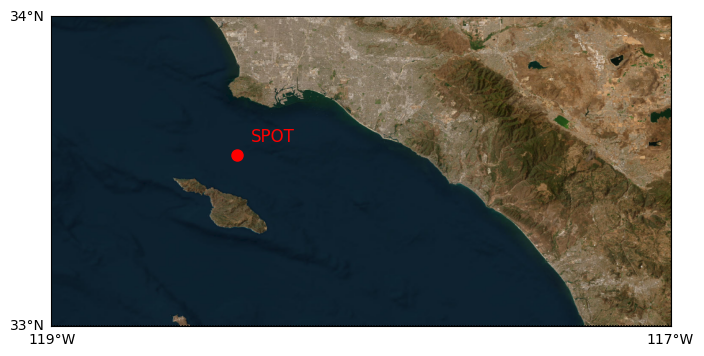

In [3]:
#SPOT Map- ChatGPT helped
os.chdir('/Users/matthewq/Geol_599/project')

# Define map boundaries
lat_min = 33
lat_max = 34
lon_min = -119
lon_max = -117

# Create map
plt.figure(figsize=(8, 10))
m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max, lat_ts=20, resolution='i', epsg=4326)

# Draw the satellite imagery for land using NASA Blue Marble
m.arcgisimage(service='World_Imagery', xpixels=1000, verbose=True)

# Plot the point
lat = 33 + 33/60
lon = -(118 + 24/60)
x, y = m(lon, lat)
m.plot(x, y, 'ro', markersize=8)

# Label the point as "SPOT"
plt.annotate('SPOT', xy=(x, y), xytext=(10, 10), textcoords='offset points', fontsize=12, color='red')

# Add degrees to the axes
parallels = range(lat_min, lat_max+1)
meridians = [lon_min, lon_max]  # Only draw the meridians at the boundary
m.drawparallels(parallels, labels=[True, False, False, False], fontsize=10)
m.drawmeridians(meridians, labels=[False, False, False, True], fontsize=10, linewidth=0.5)


# Save the map as PNG
plt.savefig('SPOT_map.png', bbox_inches='tight', dpi=300)


In [4]:
sep2000 = pd.read_csv("/Users/matthewq/Geol_599/project/CTD_byyear/2000/9-Sept/d000918C.wf.fil.aln.ctm.der.le.ba.spl.asc", sep='\s+', encoding='latin-1')
sep2000.describe()

,PrDM,Scan,T090C,C0S/m,OxC,OxTC,WetBTrans,WetBAttn,WetStar,DepSM,OxML/L,OxsatML/L,Sal00,Sigma-é00,Nbin,Flag
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.0
mean,252.999663,8034.807615,9.445608,3.678922,0.250488,14.853082,88.827034,0.474053,0.473203,251.000000,2.233125,6.453164,34.064649,26.281528,24.154309,0.0
std,145.401488,3291.801631,2.745190,0.232665,0.235352,4.406719,0.731065,0.033404,0.526978,144.193157,1.647060,0.340885,0.262856,0.709135,7.249307,0.0
min,2.014000,-926.000000,6.807500,3.471398,0.026840,8.257610,84.230000,0.454800,0.220800,2.000000,0.283860,5.065570,33.456200,23.383100,14.000000,0.0
25%,127.443500,5279.000000,7.800000,3.551745,0.091400,11.032425,88.930000,0.458800,0.271350,126.500000,1.062980,6.361360,33.946400,26.142100,20.000000,0.0
50%,252.949000,7999.000000,8.422200,3.599398,0.188060,13.768170,89.040000,0.464200,0.344700,251.000000,2.006130,6.577010,34.159400,26.542600,22.000000,0.0
75%,378.530500,10781.000000,9.994400,3.715921,0.294160,18.358835,89.160000,0.469350,0.391200,375.500000,2.791845,6.669440,34.252350,26.719500,26.000000,0.0
max,504.187000,16071.000000,21.477900,4.780163,0.899630,23.933030,89.250000,0.686300,4.000900,500.000000,6.566900,6.821880,34.316300,26.912800,86.000000,0.0


In [6]:
sep2000_bottle = pd.read_csv("/Users/matthewq/Geol_599/project/bottle_byyear/sep2000_bottle.csv")
sep2000_bottle.describe()

,ROSPOS,nom_depth,BSAL PSS-78,BSAL PSS-78_FLAG_W,BOXY (ml/l),BOXY (ml/l)_FLAG_W,NO2 (uM),NO2 (uM)_FLAG_W,N03 (uM),N03 (uM)_FLAG_W,...,NOx_FLAG_W,SIO3 \n(uM),SIO3_FLAG_W \n(uM)_FLAG_W,PO4 \n(uM),PO4_FLAG_W\n(uM)_FLAG_W,CHL-A \n(ug/l),CHL-A_FLAG_W\n(ug/l)_FLAG_W,PHAEO\n (ug/l),PHAEO_FLAG_W\n (ug/l)_FLAG_W,Notes
count,12.000000,12.000000,12.000000,12.0,12.000000,12.0,12.000000,12.0,12.000000,12.0,...,12.0,12.000000,12.0,12.000000,12.0,12.000000,12.000000,12.000000,12.000000,0.0
mean,6.500000,142.666667,33.821358,2.0,3.921653,2.0,0.121250,2.0,14.163333,2.0,...,2.0,20.511667,2.0,1.640833,2.0,-332.808333,4.333333,-332.815000,4.333333,NaN
std,3.605551,169.184855,0.333708,0.0,2.268493,0.0,0.111989,0.0,14.393944,0.0,...,0.0,23.885931,0.0,1.393181,0.0,492.015173,3.446562,492.010273,3.446562,NaN
min,1.000000,2.000000,33.480600,2.0,0.402000,2.0,0.050000,2.0,0.050000,2.0,...,2.0,1.000000,2.0,0.270000,2.0,-999.000000,2.000000,-999.000000,2.000000,NaN
25%,3.750000,27.500000,33.538700,2.0,1.860583,2.0,0.055000,2.0,0.147500,2.0,...,2.0,2.260000,2.0,0.385000,2.0,-999.000000,2.000000,-999.000000,2.000000,NaN
50%,6.500000,55.000000,33.713100,2.0,4.901833,2.0,0.065000,2.0,9.595000,2.0,...,2.0,7.515000,2.0,1.115000,2.0,0.155000,2.000000,0.070000,2.000000,NaN
75%,9.250000,225.000000,34.178275,2.0,5.548750,2.0,0.122500,2.0,27.695000,2.0,...,2.0,35.395000,2.0,2.885000,2.0,0.310000,9.000000,0.277500,9.000000,NaN
max,12.000000,500.000000,34.316000,2.0,6.575333,2.0,0.370000,2.0,36.320000,2.0,...,2.0,69.280000,2.0,3.930000,2.0,0.590000,9.000000,0.780000,9.000000,NaN


In [7]:
sep2000_bottle = sep2000_bottle.rename(columns={'SIO3 \n(uM)': 'sio3','N03 (uM)': 'no3',  'PO4 \n(uM)':'po4', 'nom_depth':'DepSM'})
sep2000_bottle.describe()

,ROSPOS,DepSM,BSAL PSS-78,BSAL PSS-78_FLAG_W,BOXY (ml/l),BOXY (ml/l)_FLAG_W,NO2 (uM),NO2 (uM)_FLAG_W,no3,N03 (uM)_FLAG_W,...,NOx_FLAG_W,sio3,SIO3_FLAG_W \n(uM)_FLAG_W,po4,PO4_FLAG_W\n(uM)_FLAG_W,CHL-A \n(ug/l),CHL-A_FLAG_W\n(ug/l)_FLAG_W,PHAEO\n (ug/l),PHAEO_FLAG_W\n (ug/l)_FLAG_W,Notes
count,12.000000,12.000000,12.000000,12.0,12.000000,12.0,12.000000,12.0,12.000000,12.0,...,12.0,12.000000,12.0,12.000000,12.0,12.000000,12.000000,12.000000,12.000000,0.0
mean,6.500000,142.666667,33.821358,2.0,3.921653,2.0,0.121250,2.0,14.163333,2.0,...,2.0,20.511667,2.0,1.640833,2.0,-332.808333,4.333333,-332.815000,4.333333,NaN
std,3.605551,169.184855,0.333708,0.0,2.268493,0.0,0.111989,0.0,14.393944,0.0,...,0.0,23.885931,0.0,1.393181,0.0,492.015173,3.446562,492.010273,3.446562,NaN
min,1.000000,2.000000,33.480600,2.0,0.402000,2.0,0.050000,2.0,0.050000,2.0,...,2.0,1.000000,2.0,0.270000,2.0,-999.000000,2.000000,-999.000000,2.000000,NaN
25%,3.750000,27.500000,33.538700,2.0,1.860583,2.0,0.055000,2.0,0.147500,2.0,...,2.0,2.260000,2.0,0.385000,2.0,-999.000000,2.000000,-999.000000,2.000000,NaN
50%,6.500000,55.000000,33.713100,2.0,4.901833,2.0,0.065000,2.0,9.595000,2.0,...,2.0,7.515000,2.0,1.115000,2.0,0.155000,2.000000,0.070000,2.000000,NaN
75%,9.250000,225.000000,34.178275,2.0,5.548750,2.0,0.122500,2.0,27.695000,2.0,...,2.0,35.395000,2.0,2.885000,2.0,0.310000,9.000000,0.277500,9.000000,NaN
max,12.000000,500.000000,34.316000,2.0,6.575333,2.0,0.370000,2.0,36.320000,2.0,...,2.0,69.280000,2.0,3.930000,2.0,0.590000,9.000000,0.780000,9.000000,NaN


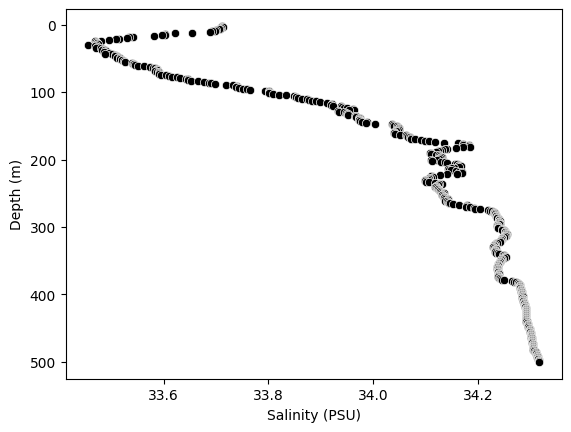

In [8]:
#plotting September 2000 salinity depth profile
sep2000_o = sns.scatterplot(data=sep2000, x="Sal00", y="DepSM", color='black')
sep2000_o.set(xlabel='Salinity (PSU)', ylabel='Depth (m)')
sep2000_o.invert_yaxis()

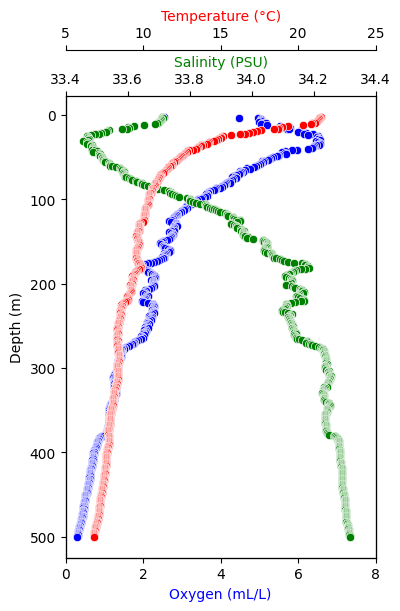

In [9]:
#Sep 2000 CTD profiles (ChatGPT helped with plotting on multiple axes)
fig, ax1 = plt.subplots(figsize=(4, 6))

# Duplicate the first axes
ax2 = ax1.twiny()
ax3 = ax1.twiny()

# Offset the two secondary axes
ax2.spines['top'].set_position(('outward', 40))
ax3.spines['top'].set_position(('outward', 80))

# Offset the two secondary axes
offset = -0.02
ax2.spines['top'].set_position(('axes', offset * -50))
ax3.spines['top'].set_position(('axes', offset * -55))

# Plot data on each axis
sns.scatterplot(data=sep2000, x="OxML/L", y="DepSM", ax=ax1, color='blue')
sns.scatterplot(data=sep2000, x="Sal00", y="DepSM", ax=ax2, color='green')
sns.scatterplot(data=sep2000, x="T090C", y="DepSM", ax=ax3, color='red')

# Set different x-axis limits for each subplot
ax1.set_xlim(0, 8)
ax2.set_xlim(33.4, 34.4)
ax3.set_xlim(5, 25)

# Set labels and legends
ax1.set_xlabel('Oxygen (mL/L)', color='blue')
ax2.set_xlabel('Salinity (PSU)', color='green')
ax3.set_xlabel('Temperature (°C)', color='red')

# Share y-axis
ax1.set_ylabel('Depth (m)')
ax1.yaxis.label.set_color('black')
ax1.invert_yaxis()

# Save the map as PNG
plt.savefig('sep2000_ctd.png', bbox_inches='tight', dpi=300)


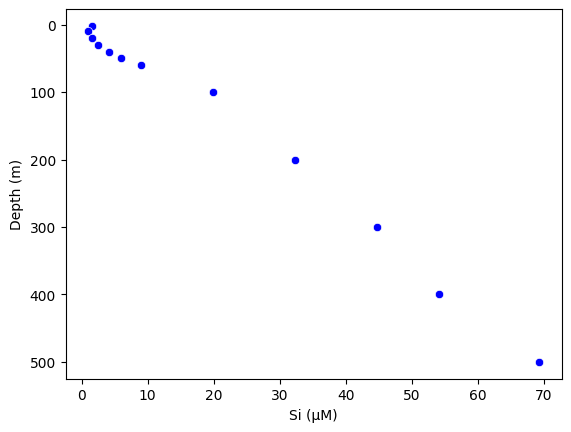

In [10]:
#plotting September 2000 bottle Si depth profile
sep2000b_si = sns.scatterplot(data=sep2000_bottle, x="sio3", y="DepSM", color='blue')
sep2000b_si.set(xlabel='Si (µM)', ylabel='Depth (m)')
sep2000b_si.invert_yaxis()
plt.savefig("sep2000b_si.png")

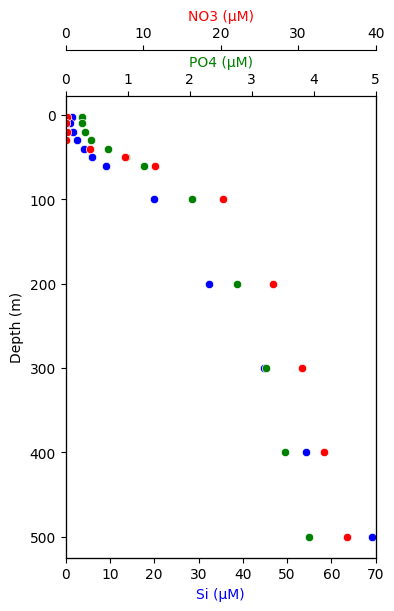

In [11]:
#Sep 2000 nutrient profiles (ChatGPT helped with plotting on multiple axes)
fig, ax1 = plt.subplots(figsize=(4, 6))

# Duplicate the first axes
ax2 = ax1.twiny()
ax3 = ax1.twiny()

# Offset the two secondary axes
ax2.spines['top'].set_position(('outward', 40))
ax3.spines['top'].set_position(('outward', 80))

# Offset the two secondary axes
offset = -0.02
ax2.spines['top'].set_position(('axes', offset * -50))
ax3.spines['top'].set_position(('axes', offset * -55))

# Plot data on each axis
sns.scatterplot(data=sep2000_bottle, x="sio3", y="DepSM", ax=ax1, color='blue')
sns.scatterplot(data=sep2000_bottle, x="po4", y="DepSM", ax=ax2, color='green')
sns.scatterplot(data=sep2000_bottle, x="no3", y="DepSM", ax=ax3, color='red')

ax1.set_xlim(0, 70)
ax2.set_xlim(0, 5)
ax3.set_xlim(0, 40)

# Set labels and legends
ax1.set_xlabel('Si (µM)', color='blue')
ax2.set_xlabel('PO4 (µM)', color='green')
ax3.set_xlabel('NO3 (µM)', color='red')

# Share y-axis
ax1.set_ylabel('Depth (m)')
ax1.yaxis.label.set_color('black')
ax1.invert_yaxis()

# Save the map as PNG
plt.savefig('sep2000_nut.png', bbox_inches='tight', dpi=300)


In [ ]:
## PROCESSING CTD DATA

In [12]:
#change the current working directory to folder with all of the separate CTD files
os.chdir('/Users/matthewq/Geol_599/project/CTD_all')
files_asc = [file for file in glob.glob("*.asc")] #creates a list of all of the data file names (ending in .asc) in the current working directory

In [13]:
#Creates empty data frame that will be filled with all of the CTD file data
all_CTD = pd.DataFrame()

#Combining all of the .asc files of CTD data into one large file
for file in files_asc:
    df = pd.read_csv(file, sep='\s+', encoding='latin-1') #encodes what it refers to as "Latin alphabet no. 1", consisting of 191 characters from the Latin script.
    all_CTD = pd.concat([all_CTD, df]) #concatenates all of the individual files into empty data frame
    
all_CTD.describe()

,PrDM,Scan,T090C,C0S/m,T190C,C1S/m,Sbeox0V,Sbeox1V,WetCDOM,CStarAt0,...,Sbeox0PS,Par/sat/log,TurbWETntu0,CTDPRS_Flag_W,CTDTMP_Flag_W,CTDTRANS_Flag_W,CTDATTEN_Flag_W,CTDFLUOR_Flag_W,CTDFLOUR_FLAG_W,CTDSAL_FLAG_W\
count,96340.000000,114749.000000,114605.000000,121668.000000,38967.000000,38967.000000,35283.000000,35283.000000,39549.00000,54720.000000,...,1777.000000,1777.000000,1777.000000,883.000000,883.000000,883.000000,883.0,883.000000,884.000000,0.0
mean,418.553923,13584.617489,7.930110,3.583671,14.327790,10.405050,0.851875,0.965365,98.03913,4.752561,...,21.988648,7.162020,0.038945,446.806935,3.501243,0.482731,0.0,443.000000,443.500000,NaN
std,255.016906,9774.853740,2.662288,1.048675,23.704539,24.656725,0.592035,0.639672,141.58566,15.276372,...,16.398691,46.275729,0.010784,257.421212,0.157409,0.087875,0.0,255.044441,255.333116,NaN
min,1.007000,-926.000000,-28.448500,0.063340,5.025700,3.335994,-0.001200,0.511700,-228.64080,-1.784000,...,10.640000,0.176460,0.016800,2.014000,3.348872,0.458300,0.0,2.000000,2.000000,NaN
25%,198.503000,4618.000000,5.768500,3.379543,5.721700,3.382850,0.522200,0.551500,2.81180,0.070300,...,11.234000,0.180750,0.034200,224.212000,3.360111,0.463500,0.0,222.500000,222.750000,NaN
50%,402.243000,12364.000000,7.426300,3.514137,7.412500,3.517573,0.621400,0.678300,9.31550,0.126500,...,12.788000,0.182000,0.037600,446.648000,3.448410,0.465600,0.0,443.000000,443.500000,NaN
75%,633.456000,21063.000000,9.282300,3.665322,9.540200,3.677881,0.967700,1.086000,184.87560,0.191200,...,26.438000,0.184810,0.043200,669.322000,3.628484,0.468600,0.0,663.500000,664.250000,NaN
max,897.291000,50784.000000,23.141600,27.684350,99.000000,99.000079,3.251900,3.889200,756.99340,58.964500,...,69.801000,829.090000,0.293900,892.233000,4.046322,1.294500,0.0,884.000000,885.000000,NaN


In [9]:
#Saves the combined CTD data as a csv file
all_CTD.to_csv('allCTD.csv', index=False)
#looking at the data, were missing a bunch of dates so I am going to add in cruise dates 

In [14]:
#changing directory to folder with all the CTD files missing dates
os.chdir('/Users/matthewq/Geol_599/project/CTD_all/missing_dates')
folder_path = "/Users/matthewq/Geol_599/project/CTD_all/missing_dates"
mis_files_asc = [file for file in glob.glob("*.asc")]
for file in mis_files_asc:
    df = pd.read_csv(file, sep='\s+', encoding='latin-1')
    # Extract file name without extension- used chatgpt for this part
    file_name = os.path.splitext(file)[0]
    # Save DataFrame as .csv file
    csv_file_path = os.path.join(folder_path, file_name + '.csv') #- used chatgpt for this part
    df.to_csv(csv_file_path, index=False)
#now that all of the CSV files are saved separately, I can manually add in dates based on their file name and put them in new folder

In [15]:
#now need to open all csv files in that folder and combine them 
os.chdir('/Users/matthewq/Geol_599/project/CTD_all/missing_dates_added')
#Creates empty data frame that will be filled with all of the missing date CTD file data
CTD_no_dates = pd.DataFrame()
mis_files_csv = [file for file in glob.glob("*.csv")]
for file in mis_files_csv:
    df = pd.read_csv(file, dtype={'user_id': int}, low_memory=False) #kept getting error about mixed data types, so dded in the type of data and low memory = False
    CTD_no_dates = pd.concat([CTD_no_dates, df])

In [16]:
#renaming FlSP (header for fluorescence) to Fluor
CTD_no_dates = CTD_no_dates.rename(columns = {'FlSP':'Fluor'})

In [17]:
#deleted all non-dated rows from all_CTD, now reloading in so it can be combined with mis_CTD
os.chdir('/Users/matthewq/Geol_599/project/CTD_all')
CTD_dates = pd.read_csv('allCTD_dates.csv')
CTD_dates

,PrDM,Scan,T090C,C0S/m,cruise date,hh:mm:ss,T190C,C1S/m,Sbeox0V,Sbeox1V,...,Sbeox0PS,Par/sat/log,TurbWETntu0,CTDPRS_Flag_W,CTDTMP_Flag_W,CTDTRANS_Flag_W,CTDATTEN_Flag_W,CTDFLUOR_Flag_W,CTDFLOUR_FLAG_W,CTDSAL_FLAG_W\
0,2.014,-926.0,21.4779,4.780163,9/18/00,11:46:51,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.021,1476.0,21.4130,4.773645,9/18/00,11:48:31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.029,2170.0,21.3730,4.770113,9/18/00,11:49:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.036,2183.0,21.3323,4.765607,9/18/00,11:49:01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.043,2220.0,21.2774,4.760086,9/18/00,11:49:02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71568,889.198,NaN,5.1100,3.343649,12/13/17,20:55:36,5.1097,3.342896,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71569,890.210,NaN,5.1099,3.343679,12/13/17,20:55:37,5.1095,3.342921,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71570,891.221,NaN,5.1101,3.343748,12/13/17,20:55:43,5.1097,3.342989,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71571,892.233,NaN,5.1103,3.343803,12/13/17,20:55:48,5.1098,3.343041,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Generate the dataframes that contain only variables that will be used in later models
CTD_no_dates_use = CTD_no_dates[['cruise date', 'PrDM', 'DepSM', 'OxML/L', 'T090C', 'Sal00', 'Fluor']].copy()
CTD_dates_use = CTD_dates[['cruise date', 'PrDM', 'DepSM', 'OxML/L', 'T090C', 'Sal00', 'FlSP', 'WetCDOM', 'WetStar']].copy() #FlSP, WetCDOM, and WetStar are all fluorescence just named differently based on when measurements were made. need to combine these 

In [19]:
#creating fluorescence column in CTD_dates_use that combines the three measurement names
CTD_dates_use['Fluor'] = CTD_dates_use[['FlSP', 'WetCDOM', 'WetStar']].sum(axis=1)
CTD_dates_use = CTD_dates_use[['cruise date','PrDM', 'DepSM', 'OxML/L', 'T090C', 'Sal00', 'Fluor']]
CTD_dates_use

,cruise date,PrDM,DepSM,OxML/L,T090C,Sal00,Fluor
0,9/18/00,2.014,2.000,2.52764,21.4779,33.7111,2.3939
1,9/18/00,3.021,3.000,4.47814,21.4130,33.7101,0.7317
2,9/18/00,4.029,4.000,4.95972,21.3730,33.7132,0.2536
3,9/18/00,5.036,5.000,5.04649,21.3323,33.7091,0.2888
4,9/18/00,6.043,6.000,5.04417,21.2774,33.7081,0.2834
...,...,...,...,...,...,...,...
71568,12/13/17,889.198,882.419,NaN,5.1100,34.4074,-1.1000
71569,12/13/17,890.210,883.426,NaN,5.1099,34.4074,-1.1000
71570,12/13/17,891.221,884.426,NaN,5.1101,34.4074,-1.1000
71571,12/13/17,892.233,885.434,NaN,5.1103,34.4074,-1.1000


In [20]:
#combine all CTD data
CTD_use = pd.concat([CTD_dates_use, CTD_no_dates_use], ignore_index=True)
CTD_use.describe()

,PrDM,DepSM,OxML/L,T090C,Sal00,Fluor
count,96340.000000,98101.000000,57677.000000,97226.000000,97226.000000,97226.000000
mean,418.553923,411.659387,1.141146,7.906657,34.118040,40.006328
std,255.016906,254.520299,1.375737,2.626880,0.985252,102.292242
min,1.007000,0.987000,-6.498890,-28.448500,2.621600,-228.640800
25%,198.503000,191.000000,0.120580,5.780100,34.137600,0.056851
50%,402.243000,396.000000,0.636630,7.412300,34.278250,0.228750
75%,633.456000,627.000000,1.675780,9.257900,34.352100,6.114450
max,897.291000,889.000000,15.451000,23.141600,141.032600,756.993400


In [21]:
#See negative temperatures and fluorescences, will set those to NA w/ help of ChatGPT
CTD_use['T090C'] = np.where(CTD_use['T090C'] < 0, np.nan, CTD_use['T090C'])
CTD_use['Fluor'] = np.where(CTD_use['Fluor'] < 0, np.nan, CTD_use['Fluor'])
CTD_use['OxML/L'] = np.where(CTD_use['OxML/L'] < 0, np.nan, CTD_use['OxML/L'])

CTD_use.isna().sum() #check for any NA values, which includes negative temp and fluorescence

cruise date     1766
PrDM            7949
DepSM           6188
OxML/L         52115
T090C           7070
Sal00           7063
Fluor          12338
dtype: int64

In [22]:
CTD_use_nona = CTD_use.dropna() #drop any NaN values
CTD_use_nona.describe()

,PrDM,DepSM,OxML/L,T090C,Sal00,Fluor
count,49522.000000,49522.000000,49522.000000,49522.000000,49522.000000,49522.000000
mean,362.973691,359.958746,1.282988,8.237656,34.044214,0.236910
std,227.125074,225.078205,1.392828,2.503426,1.092450,0.459901
min,1.007000,1.000000,0.000010,1.848800,2.621600,0.000000
25%,172.294000,171.000000,0.235177,6.418650,34.100900,0.043956
50%,344.732000,342.000000,0.800530,7.883700,34.258100,0.066637
75%,525.390000,521.000000,1.818780,9.447500,34.319700,0.288375
max,896.279000,888.000000,15.451000,21.477900,57.402300,8.522100


In [23]:
#convert DepSM to nearest whole numbers to match up with bottle data
CTD_use_nona.loc[:, 'DepSM'] = CTD_use_nona['DepSM'].round()
CTD_use_nona.describe()

,PrDM,DepSM,OxML/L,T090C,Sal00,Fluor
count,49522.000000,49522.000000,49522.000000,49522.000000,49522.000000,49522.000000
mean,362.973691,359.958746,1.282988,8.237656,34.044214,0.236910
std,227.125074,225.078205,1.392828,2.503426,1.092450,0.459901
min,1.007000,1.000000,0.000010,1.848800,2.621600,0.000000
25%,172.294000,171.000000,0.235177,6.418650,34.100900,0.043956
50%,344.732000,342.000000,0.800530,7.883700,34.258100,0.066637
75%,525.390000,521.000000,1.818780,9.447500,34.319700,0.288375
max,896.279000,888.000000,15.451000,21.477900,57.402300,8.522100


In [24]:
#saving CTD_use_nona as .csv for visual inspection
CTD_use_nona.to_csv('CTD_use_nona.csv', index=False)

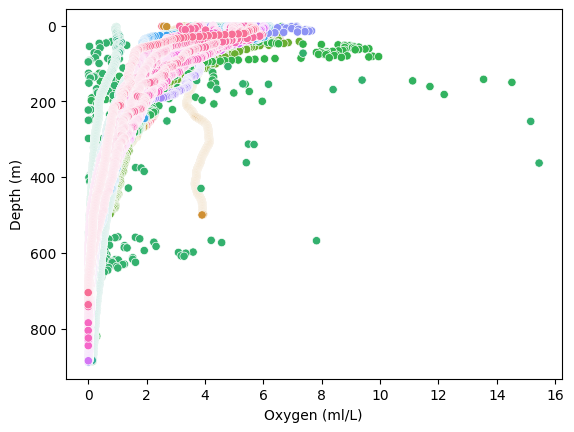

In [25]:
#plots all of the dissolved oxygen profiles 
all_o = sns.scatterplot(data=CTD_use_nona, x="OxML/L", y="DepSM", hue='cruise date', legend =False)
all_o.set(xlabel='Oxygen (ml/L)', ylabel='Depth (m)')
all_o.invert_yaxis()

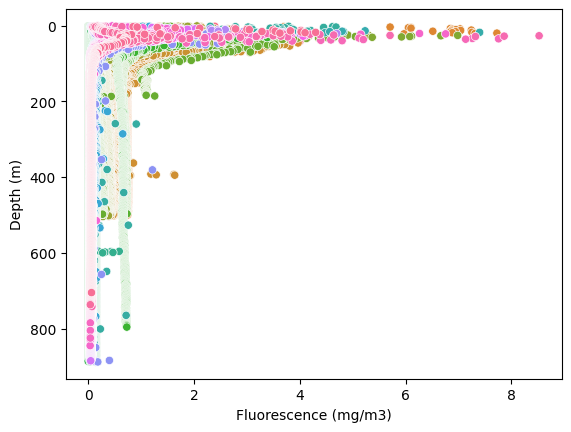

In [26]:
#plots all of the fluor profiles 
all_f = sns.scatterplot(data=CTD_use_nona, x="Fluor", y="DepSM", hue='cruise date', legend =False)
all_f.set(xlabel='Fluorescence (mg/m3)', ylabel='Depth (m)')
all_f.invert_yaxis()

In [ ]:
##PROCESSING BOTTLE NUTRIENT DATA

In [30]:
os.chdir('/Users/matthewq/Geol_599/project/bottle_byyear')
btl_nut = pd.read_csv('Bottle_all.csv')
btl_nut_use = btl_nut[['cruise date', 'DepSM', 'no2', 'no3', 'no3+no2', 'nox', 'sio3', 'po4']].copy()
btl_nut_use.describe()

,DepSM,no2,no3,no3+no2,nox,sio3,po4
count,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000
mean,208.125281,321.707596,333.545067,247.146775,241.203427,251.795236,227.559904
std,265.215181,466.790420,458.788171,415.523077,411.583539,406.741850,417.457085
min,2.000000,0.000000,0.000000,0.000000,0.010000,0.020000,0.000000
25%,30.000000,0.070000,7.912500,6.295000,6.295000,6.100000,0.747500
50%,60.000000,0.240000,31.460000,27.420000,27.420000,36.165000,2.225000
75%,300.000000,999.000000,999.000000,39.947500,39.672500,109.202500,4.385000
max,890.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000


In [32]:
btl_nut_na = btl_nut_use.replace(999, np.NaN) # convert any 999 values to NaN
btl_nut_na['po4'] = np.where(btl_nut_use['po4'] > 8, np.nan, btl_nut_use['po4']) # getting rid of outliers in po4 data
btl_nut_na['sio3'] = np.where((btl_nut_use['DepSM'] < 300) & (btl_nut_use['sio3'] > 75), np.nan, btl_nut_use['sio3']) # getting rid of outliers in sio3 data

btl_nut_na.isna().sum() #check for any NA values

cruise date      0
DepSM            0
no2            573
no3            573
no3+no2        416
nox            405
sio3           306
po4            413
dtype: int64

In [33]:
btl_nut_nona = btl_nut_na.dropna() #drop any NaN values, which now contains 999 values
btl_nut_nona.to_csv('btl_nut_use_nona.csv', index=False)

In [44]:
#merging CTD data with bottle nutrient data based on date of the cruise and depth
CTD_btl = pd.merge(CTD_use_nona, btl_nut_nona, on=['cruise date', 'DepSM'], how='inner')
CTD_btl.describe()

,PrDM,DepSM,OxML/L,T090C,Sal00,Fluor,no2,no3,no3+no2,nox,sio3,po4
count,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000
mean,149.019798,147.813223,3.171810,11.781187,33.490105,0.796631,0.199256,15.325835,15.527174,15.530860,26.792810,1.579107
std,200.171651,198.434835,1.850111,3.680170,1.715880,1.069291,0.223466,13.633972,13.589599,13.584377,62.356381,1.217536
min,2.014000,2.000000,0.002280,5.002500,10.927600,0.000000,0.000000,0.000000,0.000000,0.010000,0.020000,0.000000
25%,25.180000,25.000000,1.437400,9.133200,33.381500,0.129320,0.020000,0.760000,0.950000,0.980000,2.580000,0.470000
50%,50.364000,50.000000,3.483300,11.574500,33.577300,0.415900,0.140000,13.270000,13.630000,13.630000,11.860000,1.260000
75%,201.528000,200.000000,4.660150,14.416000,34.187300,1.038500,0.300000,27.660000,27.810000,27.810000,37.220000,2.480000
max,893.244000,885.000000,9.125790,21.477900,37.081700,7.861600,1.450000,42.380000,42.530000,42.530000,999.000000,4.720000


[Text(0.5, 0, 'Fluorescence (mg/m3)'), Text(0, 0.5, 'NO3 (µM)')]

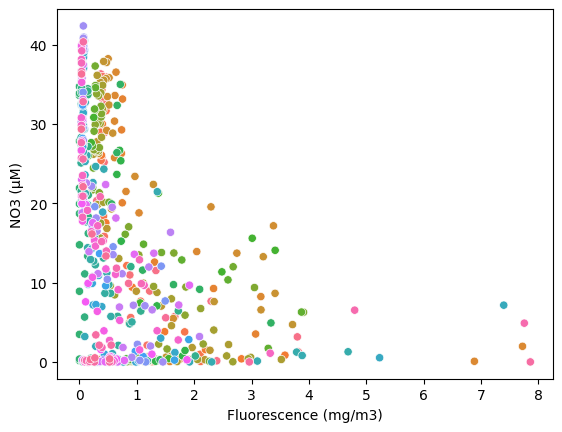

In [35]:
#plot dissolved Fluorescence vs NO3
all_o = sns.scatterplot(data=CTD_btl, x="Fluor", y="no3", hue='cruise date', legend =False)
all_o.set(xlabel='Fluorescence (mg/m3)', ylabel='NO3 (µM)')

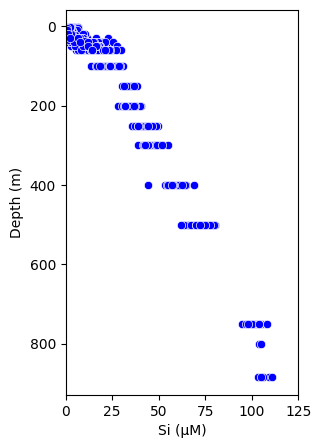

In [36]:
os.chdir('/Users/matthewq/Geol_599/project')

plt.figure(figsize=(3, 5))
btl_sio3 = sns.scatterplot(data=CTD_btl, x="sio3", y="DepSM", color='blue', legend =False)
btl_sio3.set(xlabel='Si (µM)', ylabel='Depth (m)')
btl_sio3.set_xlim(0, 125)
btl_sio3.invert_yaxis()
plt.savefig('all_btl_si.png', bbox_inches='tight', dpi=300)

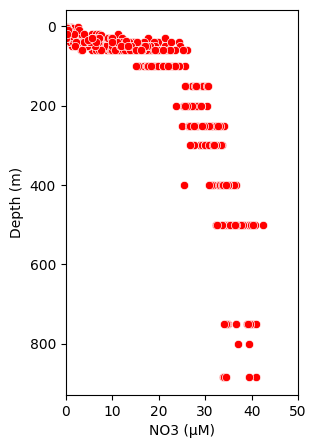

In [37]:
plt.figure(figsize=(3, 5))
btl_no3 = sns.scatterplot(data=CTD_btl, x="no3", y="DepSM", color='red', legend =False)
btl_no3.set(xlabel='NO3 (µM)', ylabel='Depth (m)')
btl_no3.set_xlim(0, 50)
btl_no3.invert_yaxis()
plt.savefig('all_btl_n.png', bbox_inches='tight', dpi=300)

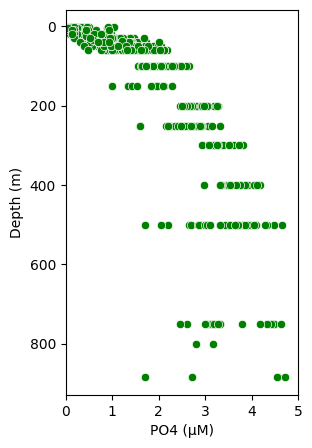

In [38]:
plt.figure(figsize=(3, 5))
btl_po4 = sns.scatterplot(data=CTD_btl, x="po4", y="DepSM", color='green', legend =False)
btl_po4.set(xlabel='PO4 (µM)', ylabel='Depth (m)')
btl_po4.set_xlim(0, 5)
btl_po4.invert_yaxis()
plt.savefig('all_btl_p.png', bbox_inches='tight', dpi=300)

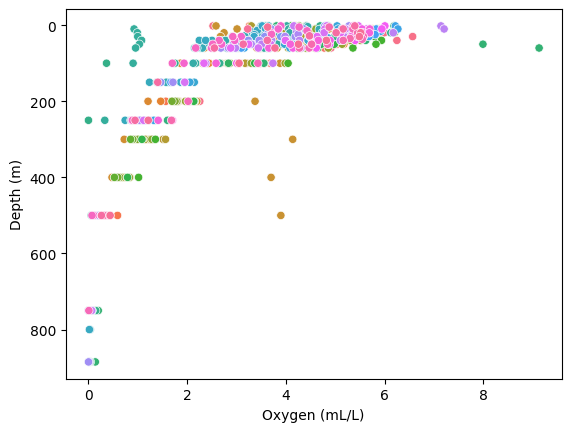

In [39]:
btl_o2 = sns.scatterplot(data=CTD_btl, x="OxML/L", y="DepSM", hue='cruise date', legend =False)
btl_o2.set(xlabel='Oxygen (mL/L)', ylabel='Depth (m)')
btl_o2.invert_yaxis()

In [ ]:
##TIME FOR MACHINE LEARNING

In [120]:
#Predicting SiO3 concentrations
X = CTD_btl[["PrDM", "DepSM", "OxML/L", "T090C", "Sal00", "Fluor"]].to_numpy()
y_si = CTD_btl["sio3"]

#Splitting data set - test = 10% of data set
X_train, X_test, y_si_train, y_si_test = train_test_split(X, y_si, test_size=0.1)

#splitting training data set further to get validation set (15% of whole data set) leaving training set 75% of whole data set
X_train, X_val, y_si_train, y_si_val = train_test_split(X_train, y_si_train, test_size=0.167)

#Hyperparameter optimization (Learning Rate)
#making empty data frame
sio3_error = pd.DataFrame(columns=['Learning Rate', 'Training MSE', 'Validation MSE'])
#different learning rates to test
l_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for i in l_rate:
    bst = XGBRegressor(n_estimators=25, learning_rate=i)
    bst = bst.fit(X_train, y_si_train.values.ravel())
    bst_ypred_train = bst.predict(X_train)
    bst_ypred_val = bst.predict(X_val)
    bst_mse_train = mean_squared_error(bst_ypred_train, y_si_train)
    bst_mse_val = mean_squared_error(bst_ypred_val, y_si_val)
    #generates row of wanted variables (number of trees, training data mse, validation data mse)
    row = [i, bst_mse_train, bst_mse_val]
    #adds rows of wanted variables to empty error dataframe
    sio3_error.loc[len(sio3_error)] = row

print(sio3_error)

    Learning Rate  Training MSE  Validation MSE
0             0.0   4910.399514      876.001981
1             0.1    330.434852       17.346051
2             0.2     22.759976       10.115984
3             0.3      2.020150       10.889400
4             0.4      0.512826       11.524008
5             0.5      0.262600       11.064833
6             0.6      0.143754       14.629868
7             0.7      0.098163       15.645399
8             0.8      0.056117       15.256206
9             0.9      0.033840     1228.686131
10            1.0      0.015535     1188.770180


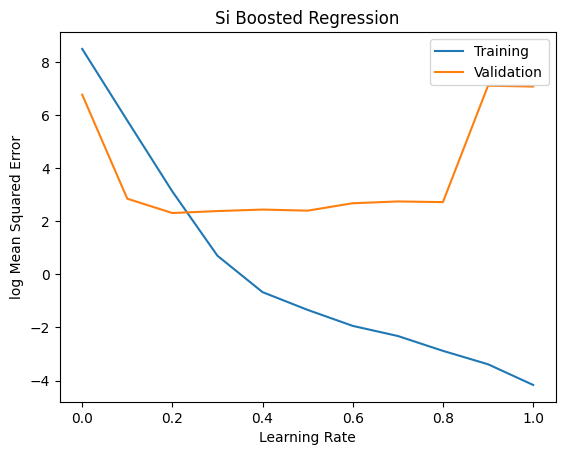

In [121]:
l_error_m = sio3_error.melt('Learning Rate', var_name='Data set', value_name='mse')
l_mse_pl = sns.lineplot(x=sio3_error['Learning Rate'], y=np.log(sio3_error['Training MSE']), label = 'Training')
l_mse_pl = sns.lineplot(x=sio3_error['Learning Rate'], y=np.log(sio3_error['Validation MSE']), label = 'Validation')

l_mse_pl.set(xlabel='Learning Rate', ylabel='log Mean Squared Error')
l_mse_pl.set_title('Si Boosted Regression')

plt.savefig('learn_train+val_si.png', bbox_inches='tight', dpi=300)


In [122]:
iterations = [2, 10, 25, 50, 100, 250, 500, 1000]
it_error = pd.DataFrame(columns=['Iterations', 'Training MSE', 'Validation MSE'])

for i in iterations:
    bst = XGBRegressor(n_estimators=i, learning_rate=0.2)
    bst = bst.fit(X_train, y_si_train.values.ravel())
    bst_ypred_train = bst.predict(X_train)
    bst_ypred_val = bst.predict(X_val)
    bst_mse_train = mean_squared_error(bst_ypred_train, y_si_train)
    bst_mse_val = mean_squared_error(bst_ypred_val, y_si_val)
    #generates row of wanted variables (number of trees, training data mse, validation data mse)
    row = [i, bst_mse_train, bst_mse_val]
    #adds rows of wanted variables to empty error dataframe
    it_error.loc[len(it_error)] = row
    
print(it_error)

   Iterations  Training MSE  Validation MSE
0         2.0   3064.751317      383.679022
1        10.0    523.987089       24.960216
2        25.0     22.759976       10.115984
3        50.0      0.595753       10.614620
4       100.0      0.082877       10.669704
5       250.0      0.000418       10.785509
6       500.0      0.000003       10.785768
7      1000.0      0.000003       10.785768


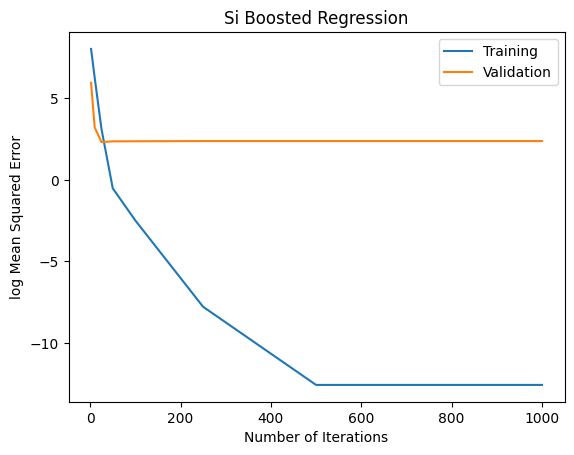

In [123]:
it_error_m = it_error.melt('Iterations', var_name='Data set', value_name='mse')
mse_pl = sns.lineplot(x=it_error['Iterations'], y=np.log(it_error['Training MSE']), label = 'Training')
mse_pl = sns.lineplot(x=it_error['Iterations'], y=np.log(it_error['Validation MSE']), label = 'Validation')

mse_pl.set(xlabel='Number of Iterations', ylabel='log Mean Squared Error')
mse_pl.set_title('Si Boosted Regression')

plt.savefig('iteration_train+val_si.png', bbox_inches='tight', dpi=300)


In [51]:
#boosted regression tree with early stopping
bst_early = XGBRegressor(n_estimators=1000, learning_rate=0.5,early_stopping_rounds=10) 
bst_early = bst_early.fit(X_train, y_si_train, eval_set=[(X_val, y_si_val)]) #fit to data- eval set fits for early stopping, where you gve it your validation set

[0]	validation_0-rmse:15.84122
[1]	validation_0-rmse:8.85504
[2]	validation_0-rmse:5.27990
[3]	validation_0-rmse:3.93482
[4]	validation_0-rmse:3.41134
[5]	validation_0-rmse:3.30924
[6]	validation_0-rmse:3.23083
[7]	validation_0-rmse:3.21974
[8]	validation_0-rmse:3.24222
[9]	validation_0-rmse:3.23627
[10]	validation_0-rmse:3.22580
[11]	validation_0-rmse:3.24758
[12]	validation_0-rmse:3.21659
[13]	validation_0-rmse:3.21200
[14]	validation_0-rmse:3.21375
[15]	validation_0-rmse:3.20701
[16]	validation_0-rmse:3.21170
[17]	validation_0-rmse:3.20642
[18]	validation_0-rmse:3.20434
[19]	validation_0-rmse:3.20027
[20]	validation_0-rmse:3.16423
[21]	validation_0-rmse:3.15128
[22]	validation_0-rmse:3.14802
[23]	validation_0-rmse:3.14964
[24]	validation_0-rmse:3.14632
[25]	validation_0-rmse:3.15265
[26]	validation_0-rmse:3.14901
[27]	validation_0-rmse:3.14576
[28]	validation_0-rmse:3.14086
[29]	validation_0-rmse:3.13953
[30]	validation_0-rmse:3.14537
[31]	validation_0-rmse:3.14888
[32]	validation_0

In [124]:
#running boosted regression
bst = XGBRegressor(n_estimators=25, learning_rate=0.2) #100 estimators and 0.2 for learning rate basd on minimal validation error
bst = bst.fit(X_train, y_si_train)

bst_ypred_test = bst.predict(X_test)
bst_ypred_train = bst.predict(X_train)
bst_ypred_val = bst.predict(X_val)

si_bst_mse_test = mean_squared_error(bst_ypred_test, y_si_test)
si_bst_mse_train = mean_squared_error(bst_ypred_train, y_si_train)
si_bst_mse_val = mean_squared_error(bst_ypred_val, y_si_val)



In [125]:
print([si_bst_mse_test, si_bst_mse_train, si_bst_mse_val])

[5.661041957963908, 22.759975637871616, 10.115983910456594]


In [126]:
#testing against baseline linear regression
reg = linear_model.LinearRegression()
reg.fit(X_train, y_si_train)

reg_ypred_test = reg.predict(X_test)
reg_ypred_train = reg.predict(X_train)
reg_ypred_val = reg.predict(X_val)

si_reg_mse_test = mean_squared_error(reg_ypred_test, y_si_test)
si_reg_mse_train = mean_squared_error(reg_ypred_train, y_si_train)
si_reg_mse_val = mean_squared_error(reg_ypred_val, y_si_val)



In [127]:
print([si_reg_mse_test, si_reg_mse_train, si_reg_mse_val])

[130.5768492560352, 3575.8795972561193, 140.58170292190727]


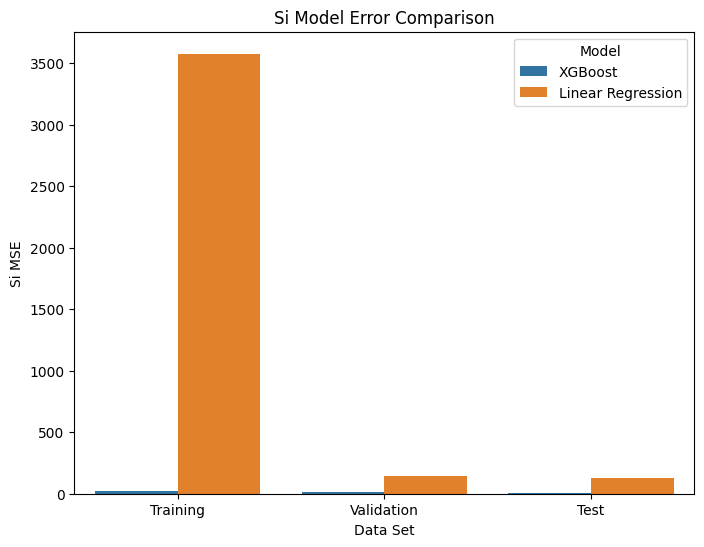

In [128]:
#ChatGPT helped make multiple bar plot for each data set
data = {
    'Category': ['Training', 'Validation', 'Test'],
    'XGBoost': [si_bst_mse_train, si_bst_mse_val, si_bst_mse_test],
    'Linear Regression': [si_reg_mse_train, si_reg_mse_val, si_reg_mse_test]
}
df = pd.DataFrame(data)

# Melt the DataFrame to long format
melted_df = df.melt(id_vars='Category', var_name='Model', value_name='Si MSE')

# Create the bar plot
plt.figure(figsize=(8, 6))
si_bstvreg_bar = sns.barplot(x='Category', y='Si MSE', hue='Model', data=melted_df)
si_bstvreg_bar.set(xlabel='Data Set', ylabel='Si MSE')
si_bstvreg_bar.set_title('Si Model Error Comparison')

plt.savefig('bar_mse_si.png', bbox_inches='tight', dpi=300)


In [129]:
features = ["Pressure", "Depth", "Oxygen", "Temperature", "Salinity", "Fluorescence"] #dominant wave period, average wave period, wave direction, water temperature
featuresdf = pd.DataFrame(np.hstack((features)), columns = ['feature'])
featuresdf

,feature
0,Pressure
1,Depth
2,Oxygen
3,Temperature
4,Salinity
5,Fluorescence


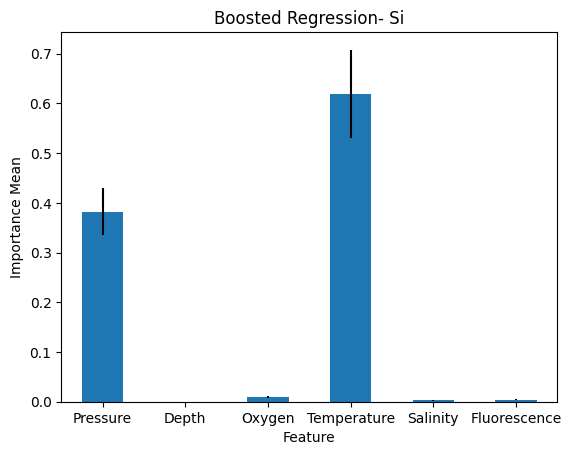

In [130]:
r_bst = permutation_importance(bst, X_test, y_si_test, n_repeats=10, random_state=0)

imp_means_bst = pd.DataFrame(np.hstack((r_bst.importances_mean)), columns = ['mean'])
imp_std_bst = pd.DataFrame(np.hstack((r_bst.importances_std)), columns = ['std'])

feature_imp_bst = [featuresdf, imp_means_bst, imp_std_bst]
bst_imp_df = feature_imp_bst[0].join(feature_imp_bst[1:])
bst_imp_df

bst_ax = bst_imp_df.plot(kind='bar', x='feature', y='mean', yerr='std', rot=0)
bst_ax.set(xlabel='Feature', ylabel='Importance Mean')
bst_ax.legend_.remove()
bst_ax.set_title('Boosted Regression- Si')
plt.savefig('bst_impt_si.png', bbox_inches='tight', dpi=300)


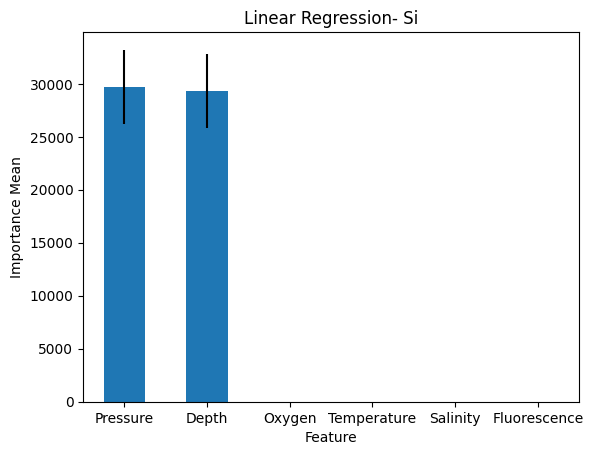

In [131]:
r_reg = permutation_importance(reg, X_test, y_si_test, n_repeats=10, random_state=0)

imp_means_reg = pd.DataFrame(np.hstack((r_reg.importances_mean)), columns = ['mean'])
imp_std_reg = pd.DataFrame(np.hstack((r_reg.importances_std)), columns = ['std'])

feature_imp_reg = [featuresdf, imp_means_reg, imp_std_reg]
reg_imp_df = feature_imp_reg[0].join(feature_imp_reg[1:])

reg_ax = reg_imp_df.plot(kind='bar', x='feature', y='mean', yerr='std', rot=0)
reg_ax.set(xlabel='Feature', ylabel='Importance Mean')
reg_ax.legend_.remove()
reg_ax.set_title('Linear Regression- Si')

plt.savefig('reg_impt_si.png', bbox_inches='tight', dpi=300)


In [132]:
#Si prediction for just sep2000
#trying just interpolation w/ 5m depth increments
depth_inc = np.arange(0, 500, 5).tolist() #max CTD_btl depth = 500

# Interpolate concentrations for each desired depth (used ChatGPT for help)
interpolated_concentrations = {} #empty data frame
for param in btl_nut_nona.columns[1:]:  # Exclude the 'Depth' column
    interpolated_concentrations['sio3_int'] = np.interp(depth_inc, sep2000_bottle['DepSM'], sep2000_bottle['sio3'])

# Create a new DataFrame to store interpolated concentrations
sep2000_int_si = pd.DataFrame(interpolated_concentrations)
sep2000_int_si['DepSM'] = depth_inc  # Add depth values to the DataFrame

#print(sep2000_int_si)

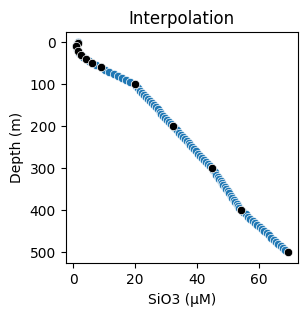

In [205]:
plt.figure(figsize=(3, 3))
sep2000_int_sio3 = sns.scatterplot(data=sep2000_int_si, x="sio3_int", y="DepSM", legend =False)
sep2000_int_sio3 = sns.scatterplot(data=sep2000_bottle,  x="sio3", y="DepSM", color='black')
sep2000_int_sio3.set(xlabel='SiO3 (µM)', ylabel='Depth (m)')
sep2000_int_sio3.invert_yaxis()
sep2000_int_sio3.set_title('Interpolation')

plt.savefig('sep2000_si_impt.png', bbox_inches='tight', dpi=300)

In [143]:
#Interpolating just from surface to deepest 

#Extract shallowest and deepest samples (used ChatGPT for help)
shallowest_sep2000 = sep2000_bottle.iloc[0] #.iloc[0] selects first row of data frame
deepest_sep2000 = sep2000_bottle.iloc[-1] #.iloc[-1] selects last row of data frame


interpolated_concentrations = {} #empty data frame
for param in btl_nut_nona.columns[1:]:  # Exclude the 'Depth' column
    interpolated_concentrations['sio3_int'] = np.interp(depth_inc, [shallowest_sample['DepSM'], deepest_sample['DepSM']], [shallowest_sample['sio3'], deepest_sample['sio3']])

# Create a new DataFrame to store interpolated concentrations
sep2000_int_si_sd = pd.DataFrame(interpolated_concentrations)
sep2000_int_si_sd['DepSM'] = depth_inc  # Add depth values to the DataFrame


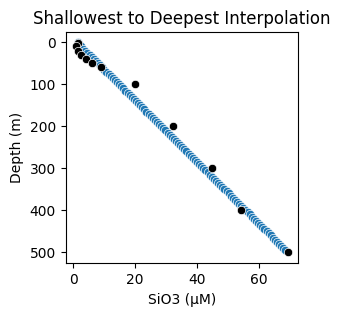

In [206]:
plt.figure(figsize=(3, 3))
sep2000_int_sio3_sd = sns.scatterplot(data=sep2000_int_si_sd, x="sio3_int", y="DepSM", legend =False)
sep2000_int_sio3_sd = sns.scatterplot(data=sep2000_bottle,  x="sio3", y="DepSM", color='black')
sep2000_int_sio3_sd.set(xlabel='SiO3 (µM)', ylabel='Depth (m)')
sep2000_int_sio3_sd.invert_yaxis()
sep2000_int_sio3_sd.set_title('Shallowest to Deepest Interpolation')

plt.savefig('sep2000_si_sd_impt.png', bbox_inches='tight', dpi=300)

In [72]:
X_sep2000 = sep2000[["PrDM", "DepSM", "OxML/L", "T090C", "Sal00", "WetStar"]].to_numpy()
sio3_pred_bst = bst.predict(X_sep2000)
sio3_pred_bst_df = pd.DataFrame(sio3_pred_bst, columns =['sio3_bst'])
#sio3_pred_bst_df.describe()

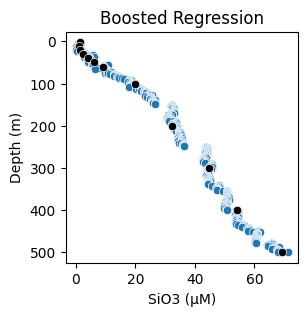

In [207]:
plt.figure(figsize=(3, 3))
sep2000_sipred_bst = pd.concat([sep2000, sio3_pred_bst_df], axis=1)
sep2000_bst_pred_sio3 = sns.scatterplot(data=sep2000_sipred_bst, x="sio3_bst", y="DepSM", legend =False)
sep2000_bst_pred_sio3 = sns.scatterplot(data=sep2000_bottle,  x="sio3", y="DepSM", color='black')
sep2000_bst_pred_sio3.set(xlabel='SiO3 (µM)', ylabel='Depth (m)')
sep2000_bst_pred_sio3.invert_yaxis()
sep2000_bst_pred_sio3.set_title('Boosted Regression')
plt.savefig('sep2000_si_bst.png', bbox_inches='tight', dpi=300)

In [76]:
sio3_pred_reg = reg.predict(X_sep2000)
sio3_pred_reg_df = pd.DataFrame(sio3_pred_reg, columns =['sio3_reg'])
#sio3_pred_reg_df.describe()

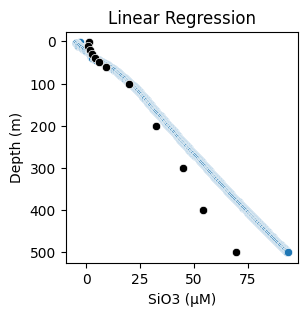

In [208]:
plt.figure(figsize=(3, 3))
sep2000_sipred_reg = pd.concat([sep2000, sio3_pred_reg_df], axis=1)
sep2000_reg_pred_sio3 = sns.scatterplot(data=sep2000_sipred_reg, x="sio3_reg", y="DepSM", legend =False)
sep2000_reg_pred_sio3 = sns.scatterplot(data=sep2000_bottle,  x="sio3", y="DepSM", color='black')
sep2000_reg_pred_sio3.set(xlabel='SiO3 (µM)', ylabel='Depth (m)')
sep2000_reg_pred_sio3.invert_yaxis()
sep2000_reg_pred_sio3.set_title('Linear Regression')
plt.savefig('sep2000_si_reg.png', bbox_inches='tight', dpi=300)

In [141]:
sep2000_bst = pd.merge(sep2000_bottle, sep2000_sipred_bst, on=['DepSM'])
sep2000_reg = pd.merge(sep2000_bottle, sep2000_sipred_reg, on=['DepSM'])
sep2000_int = pd.merge(sep2000_bottle, sep2000_int_si, on=['DepSM'])
sep2000_int_sd = pd.merge(sep2000_bottle, sep2000_int_si_sd, on=['DepSM'])

In [203]:
sep2000_mse_bst = mean_squared_error(sep2000_bst['sio3'], sep2000_bst['sio3_bst'])
sep2000_mse_reg = mean_squared_error(sep2000_reg['sio3'], sep2000_reg['sio3_reg'])
sep2000_mse_int = mean_squared_error(sep2000_int['sio3'], sep2000_int['sio3_int'])
sep2000_mse_int_sd = mean_squared_error(sep2000_int_sd['sio3'], sep2000_int_sd['sio3_int'])

print(sep2000_mse_bst, sep2000_mse_reg, sep2000_mse_int, sep2000_mse_int_sd)

0.3744925974122788 98.79423046477307 0.0 7.60467993613006


In [ ]:
## NO3 Model

In [149]:
#Predicting NO3 concentrations
X = CTD_btl[["PrDM", "DepSM", "OxML/L", "T090C", "Sal00", "Fluor"]].to_numpy()
y_n = CTD_btl["no3"]

#Splitting data set - test = 10% of data set
X_train, X_test, y_n_train, y_n_test = train_test_split(X, y_n, test_size=0.1)

#splitting training data set further to get validation set (15% of whole data set) leaving training set 75% of whole data set
X_train, X_val, y_n_train, y_n_val = train_test_split(X_train, y_n_train, test_size=0.167)

#Hyperparameter optimization (Learning Rate)
#making empty data frame
no3_error = pd.DataFrame(columns=['Learning Rate', 'Training MSE', 'Validation MSE'])

for i in l_rate:
    bst = XGBRegressor(n_estimators=25, learning_rate=i)
    bst = bst.fit(X_train, y_n_train.values.ravel())
    bst_ypred_train = bst.predict(X_train)
    bst_ypred_val = bst.predict(X_val)
    bst_mse_train = mean_squared_error(bst_ypred_train, y_n_train)
    bst_mse_val = mean_squared_error(bst_ypred_val, y_n_val)
    #generates row of wanted variables (number of trees, training data mse, validation data mse)
    row = [i, bst_mse_train, bst_mse_val]
    #adds rows of wanted variables to empty error dataframe
    no3_error.loc[len(no3_error)] = row

print(no3_error)

    Learning Rate  Training MSE  Validation MSE
0             0.0    182.305678      182.681003
1             0.1      2.191453       12.090699
2             0.2      0.323490       11.317908
3             0.3      0.185437       11.968247
4             0.4      0.111633       10.751075
5             0.5      0.057075       10.608787
6             0.6      0.037056       12.631725
7             0.7      0.034613       13.286028
8             0.8      0.012102       13.670367
9             0.9      0.011152       16.154938
10            1.0      0.005104       18.124084


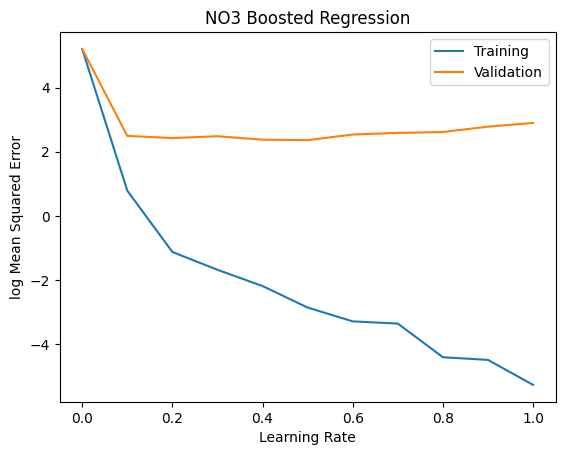

In [150]:
l_error_m = no3_error.melt('Learning Rate', var_name='Data set', value_name='mse')
l_mse_pl = sns.lineplot(x=no3_error['Learning Rate'], y=np.log(no3_error['Training MSE']), label = 'Training')
l_mse_pl = sns.lineplot(x=no3_error['Learning Rate'], y=np.log(no3_error['Validation MSE']), label = 'Validation')

l_mse_pl.set(xlabel='Learning Rate', ylabel='log Mean Squared Error')
l_mse_pl.set_title('NO3 Boosted Regression')

plt.savefig('learn_train+val_n.png', bbox_inches='tight', dpi=300)

In [151]:
no3it_error = pd.DataFrame(columns=['Iterations', 'Training MSE', 'Validation MSE'])

for i in iterations:
    bst = XGBRegressor(n_estimators=i, learning_rate=0.5)
    bst = bst.fit(X_train, y_n_train.values.ravel())
    bst_ypred_train = bst.predict(X_train)
    bst_ypred_val = bst.predict(X_val)
    bst_mse_train = mean_squared_error(bst_ypred_train, y_n_train)
    bst_mse_val = mean_squared_error(bst_ypred_val, y_n_val)
    #generates row of wanted variables (number of trees, training data mse, validation data mse)
    row = [i, bst_mse_train, bst_mse_val]
    #adds rows of wanted variables to empty error dataframe
    no3it_error.loc[len(no3it_error)] = row

print(no3it_error)

   Iterations  Training MSE  Validation MSE
0         2.0     15.438394       23.151560
1        10.0      0.417538       10.095549
2        25.0      0.057075       10.608787
3        50.0      0.003715       10.723762
4       100.0      0.000042       10.706407
5       250.0      0.000003       10.704587
6       500.0      0.000003       10.704587
7      1000.0      0.000003       10.704587


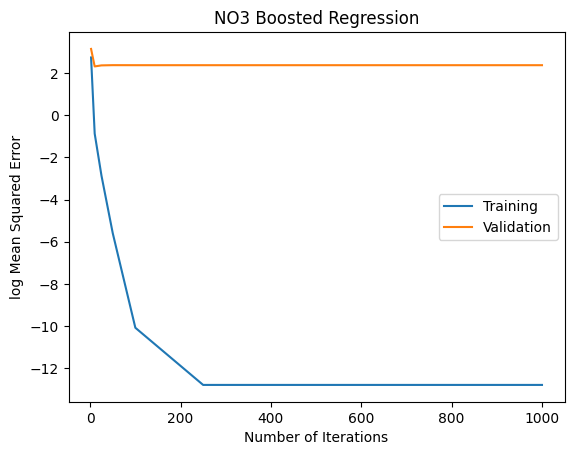

In [152]:
no3it_error_m = no3it_error.melt('Iterations', var_name='Data set', value_name='mse')
mse_pl = sns.lineplot(x=no3it_error['Iterations'], y=np.log(no3it_error['Training MSE']), label = 'Training')
mse_pl = sns.lineplot(x=no3it_error['Iterations'], y=np.log(no3it_error['Validation MSE']), label = 'Validation')

mse_pl.set(xlabel='Number of Iterations', ylabel='log Mean Squared Error')
mse_pl.set_title('NO3 Boosted Regression')

plt.savefig('iteration_train+valno3_n.png', bbox_inches='tight', dpi=300)

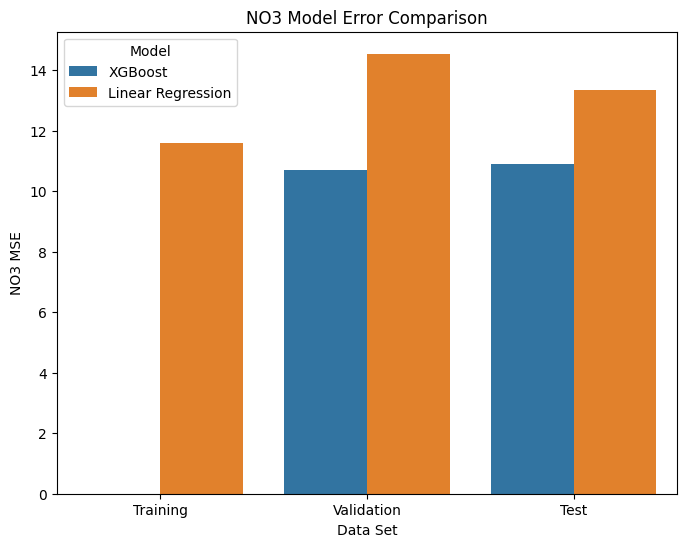

In [153]:
#running boosted regression
no3bst = XGBRegressor(n_estimators=10, learning_rate=0.5) 
no3bst = bst.fit(X_train, y_n_train)

no3bst_ypred_test = no3bst.predict(X_test)
no3bst_ypred_train = no3bst.predict(X_train)
no3bst_ypred_val = no3bst.predict(X_val)

no3bst_mse_test = mean_squared_error(no3bst_ypred_test, y_n_test)
no3bst_mse_train = mean_squared_error(no3bst_ypred_train, y_n_train)
no3bst_mse_val = mean_squared_error(no3bst_ypred_val, y_n_val)


#testing against baseline linear regression
no3reg = linear_model.LinearRegression()
no3reg.fit(X_train, y_n_train)

no3reg_ypred_test = no3reg.predict(X_test)
no3reg_ypred_train = no3reg.predict(X_train)
no3reg_ypred_val = no3reg.predict(X_val)

no3reg_mse_test = mean_squared_error(no3reg_ypred_test, y_n_test)
no3reg_mse_train = mean_squared_error(no3reg_ypred_train, y_n_train)
no3reg_mse_val = mean_squared_error(no3reg_ypred_val, y_n_val)

data = {
    'Category': ['Training', 'Validation', 'Test'],
    'XGBoost': [no3bst_mse_train, no3bst_mse_val, no3bst_mse_test],
    'Linear Regression': [no3reg_mse_train, no3reg_mse_val, no3reg_mse_test]
}
df = pd.DataFrame(data)

# Melt the DataFrame to long format
melted_df = df.melt(id_vars='Category', var_name='Model', value_name='NO3 MSE')

# Create the bar plot
plt.figure(figsize=(8, 6))
n_bstvreg_bar = sns.barplot(x='Category', y='NO3 MSE', hue='Model', data=melted_df)
n_bstvreg_bar.set(xlabel='Data Set', ylabel='NO3 MSE')
n_bstvreg_bar.set_title('NO3 Model Error Comparison')

plt.savefig('bar_mse_no3.png', bbox_inches='tight', dpi=300)


In [154]:
print([no3bst_mse_test, no3bst_mse_train, no3bst_mse_val, no3reg_mse_test, no3reg_mse_train, no3reg_mse_val])

[10.896356637852005, 2.799728667178038e-06, 10.704586932058223, 13.351156750928466, 11.572986883438306, 14.539399793224613]


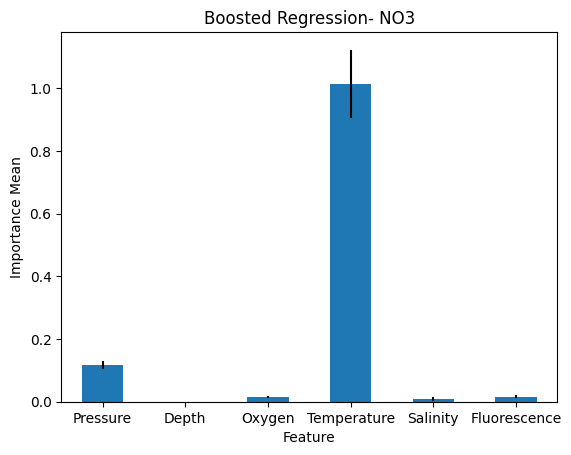

In [155]:
r_no3bst = permutation_importance(no3bst, X_test, y_n_test, n_repeats=10, random_state=0)

imp_means_no3bst = pd.DataFrame(np.hstack((r_no3bst.importances_mean)), columns = ['mean'])
imp_std_no3bst = pd.DataFrame(np.hstack((r_no3bst.importances_std)), columns = ['std'])

feature_imp_no3bst = [featuresdf, imp_means_no3bst, imp_std_no3bst]
bst_imp_df = feature_imp_no3bst[0].join(feature_imp_no3bst[1:])
bst_imp_df

no3bst_ax = bst_imp_df.plot(kind='bar', x='feature', y='mean', yerr='std', rot=0)
no3bst_ax.set(xlabel='Feature', ylabel='Importance Mean')
no3bst_ax.legend_.remove()
no3bst_ax.set_title('Boosted Regression- NO3')
plt.savefig('bst_impt_n.png', bbox_inches='tight', dpi=300)

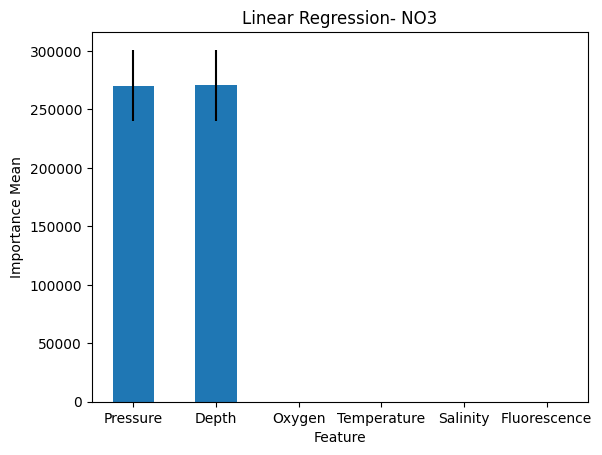

In [156]:
r_no3reg = permutation_importance(no3reg, X_test, y_n_test, n_repeats=10, random_state=0)

imp_means_no3reg = pd.DataFrame(np.hstack((r_no3reg.importances_mean)), columns = ['mean'])
imp_std_no3reg = pd.DataFrame(np.hstack((r_no3reg.importances_std)), columns = ['std'])

feature_imp_no3reg = [featuresdf, imp_means_no3reg, imp_std_no3reg]
no3reg_imp_df = feature_imp_no3reg[0].join(feature_imp_no3reg[1:])

no3reg_ax = no3reg_imp_df.plot(kind='bar', x='feature', y='mean', yerr='std', rot=0)
no3reg_ax.set(xlabel='Feature', ylabel='Importance Mean')
no3reg_ax.legend_.remove()
no3reg_ax.set_title('Linear Regression- NO3')

plt.savefig('reg_impt_n.png', bbox_inches='tight', dpi=300)

In [210]:
#NO3 prediction for just sep2000
#trying just interpolation w/ 5m depth increments
depth_inc = np.arange(0, 500, 5).tolist() #max CTD_btl depth = 88

# Interpolate concentrations for each desired depth (used ChatGPT for help)
interpolated_concentrations = {} #empty data frame
for param in btl_nut_nona.columns[1:]:  # Exclude the 'Depth' column
    interpolated_concentrations['no3_int'] = np.interp(depth_inc, sep2000_bottle['DepSM'], sep2000_bottle['no3'])

# Create a new DataFrame to store interpolated concentrations
sep2000_int_no3 = pd.DataFrame(interpolated_concentrations)
sep2000_int_no3['DepSM'] = depth_inc  # Add depth values to the DataFrame

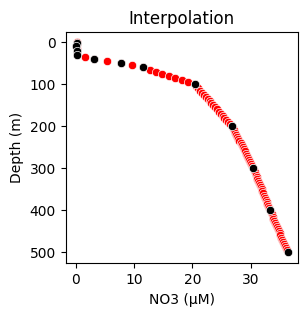

In [211]:
plt.figure(figsize=(3, 3))
sep2000_int_no3 = sns.scatterplot(data=sep2000_int_no3, x="no3_int", y="DepSM", color = "red", legend =False)
sep2000_int_no3 = sns.scatterplot(data=sep2000_bottle,  x="no3", y="DepSM", color='black')
sep2000_int_no3.set(xlabel='NO3 (µM)', ylabel='Depth (m)')
sep2000_int_no3.invert_yaxis()
sep2000_int_no3.set_title('Interpolation')

plt.savefig('sep2000_n_impt.png', bbox_inches='tight', dpi=300)


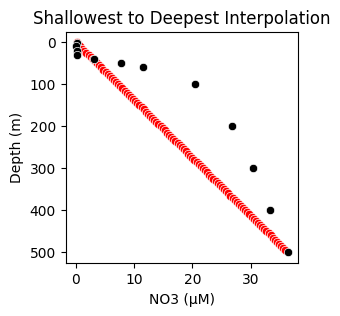

In [212]:
#Interpolating just from surface to deepest 
interpolated_concentrations = {} #empty data frame
for param in btl_nut_nona.columns[1:]:  # Exclude the 'Depth' column
    interpolated_concentrations['no3_int_sd'] = np.interp(depth_inc, [shallowest_sample['DepSM'], deepest_sample['DepSM']], [shallowest_sample['no3'], deepest_sample['no3']])

# Create a new DataFrame to store interpolated concentrations
sep2000_int_no3_sd = pd.DataFrame(interpolated_concentrations)
sep2000_int_no3_sd['DepSM'] = depth_inc  # Add depth values to the DataFrame

plt.figure(figsize=(3, 3))
sep2000_int_no3_sd_p = sns.scatterplot(data=sep2000_int_no3_sd, x="no3_int_sd", y="DepSM", color = 'red', legend =False)
sep2000_int_no3_sd_p = sns.scatterplot(data=sep2000_bottle,  x="no3", y="DepSM", color='black')
sep2000_int_no3_sd_p.set(xlabel='NO3 (µM)', ylabel='Depth (m)')
sep2000_int_no3_sd_p.invert_yaxis()
sep2000_int_no3_sd_p.set_title('Shallowest to Deepest Interpolation')

plt.savefig('sep2000_n_sd_impt.png', bbox_inches='tight', dpi=300)

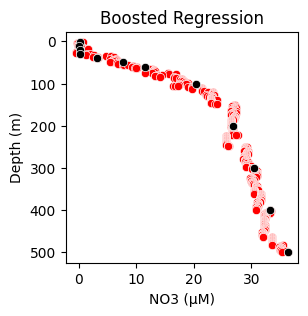

In [213]:
no3_pred_bst = no3bst.predict(X_sep2000)
no3_pred_bst_df = pd.DataFrame(no3_pred_bst, columns =['no3_bst'])

plt.figure(figsize=(3, 3))
sep2000_npred_bst = pd.concat([sep2000, no3_pred_bst_df], axis=1)
sep2000_bst_pred_no3 = sns.scatterplot(data=sep2000_npred_bst, x="no3_bst", y="DepSM", color = 'red', legend =False)
sep2000_bst_pred_no3 = sns.scatterplot(data=sep2000_bottle,  x="no3", y="DepSM", color='black')
sep2000_bst_pred_no3.set(xlabel='NO3 (µM)', ylabel='Depth (m)')
sep2000_bst_pred_no3.invert_yaxis()
sep2000_bst_pred_no3.set_title('Boosted Regression')
plt.savefig('sep2000_n_bst.png', bbox_inches='tight', dpi=300)

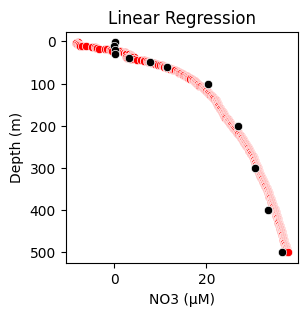

In [214]:
no3_pred_reg = no3reg.predict(X_sep2000)
no3_pred_reg_df = pd.DataFrame(no3_pred_reg, columns =['no3_reg'])

plt.figure(figsize=(3, 3))
sep2000_npred_reg = pd.concat([sep2000, no3_pred_reg_df], axis=1)
sep2000_reg_pred_no3 = sns.scatterplot(data=sep2000_npred_reg, x="no3_reg", y="DepSM", color = 'red', legend =False)
sep2000_reg_pred_no3 = sns.scatterplot(data=sep2000_bottle,  x="no3", y="DepSM", color='black')
sep2000_reg_pred_no3.set(xlabel='NO3 (µM)', ylabel='Depth (m)')
sep2000_reg_pred_no3.invert_yaxis()
sep2000_reg_pred_no3.set_title('Linear Regression')
plt.savefig('sep2000_n_reg.png', bbox_inches='tight', dpi=300)

In [178]:
sep2000_int_no3_sd

<Axes: title={'center': 'Shallowest to Deepest Interpolation'}, xlabel='NO3 (µM)', ylabel='Depth (m)'>

In [221]:
sep2000_bst_n = pd.merge(sep2000_bottle, sep2000_npred_bst, on=['DepSM'])
sep2000_reg_n = pd.merge(sep2000_bottle, sep2000_npred_reg, on=['DepSM'])
#sep2000_int_n = pd.merge(sep2000_bottle, sep2000_int_no3, on=['DepSM'])
sep2000_int_n_sd = pd.merge(sep2000_bottle, sep2000_int_no3_sd, on=['DepSM'])

sep2000_mse_bst_n = mean_squared_error(sep2000_bst_n['no3'], sep2000_bst_n['no3_bst'])
sep2000_mse_reg_n = mean_squared_error(sep2000_reg_n['no3'], sep2000_reg_n['no3_reg'])
#sep2000_mse_int_n = mean_squared_error(sep2000_int_n['no3'], sep2000_int_n['no3_reg'])
sep2000_mse_int_n_sd = mean_squared_error(sep2000_int_n_sd['no3'], sep2000_int_n_sd['no3_int_sd'])

print(sep2000_mse_bst_n, sep2000_mse_reg_n, sep2000_mse_int_n_sd)

0.8647101302159633 11.552430424293481 48.84857738423574


In [ ]:
## PO4 MODEL

In [185]:
#Predicting PO4 concentrations
X = CTD_btl[["PrDM", "DepSM", "OxML/L", "T090C", "Sal00", "Fluor"]].to_numpy()
y_p = CTD_btl["po4"]

#Splitting data set - test = 10% of data set
X_train, X_test, y_p_train, y_p_test = train_test_split(X, y_p, test_size=0.1)

#splitting training data set further to get validation set (15% of whole data set) leaving training set 75% of whole data set
X_train, X_val, y_p_train, y_p_val = train_test_split(X_train, y_p_train, test_size=0.167)

#Hyperparameter optimization (Learning Rate)
#making empty data frame
po4_error = pd.DataFrame(columns=['Learning Rate', 'Training MSE', 'Validation MSE'])

for i in l_rate:
    bst = XGBRegressor(n_estimators=25, learning_rate=i)
    bst = bst.fit(X_train, y_p_train.values.ravel())
    bst_ypred_train = bst.predict(X_train)
    bst_ypred_val = bst.predict(X_val)
    bst_mse_train = mean_squared_error(bst_ypred_train, y_p_train)
    bst_mse_val = mean_squared_error(bst_ypred_val, y_p_val)
    #generates row of wanted variables (number of trees, training data mse, validation data mse)
    row = [i, bst_mse_train, bst_mse_val]
    #adds rows of wanted variables to empty error dataframe
    po4_error.loc[len(po4_error)] = row

print(po4_error)

    Learning Rate  Training MSE  Validation MSE
0             0.0      1.505376        1.321936
1             0.1      0.033170        0.063549
2             0.2      0.008400        0.066181
3             0.3      0.005347        0.064110
4             0.4      0.003297        0.075147
5             0.5      0.001768        0.071911
6             0.6      0.001699        0.082860
7             0.7      0.001009        0.094163
8             0.8      0.000519        0.104563
9             0.9      0.000292        0.083653
10            1.0      0.000202        0.103316


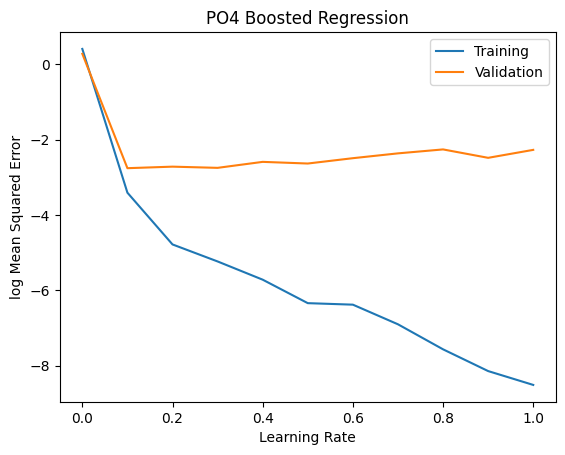

In [186]:
l_error_m = po4_error.melt('Learning Rate', var_name='Data set', value_name='mse')
l_mse_pl = sns.lineplot(x=po4_error['Learning Rate'], y=np.log(po4_error['Training MSE']), label = 'Training')
l_mse_pl = sns.lineplot(x=po4_error['Learning Rate'], y=np.log(po4_error['Validation MSE']), label = 'Validation')

l_mse_pl.set(xlabel='Learning Rate', ylabel='log Mean Squared Error')
l_mse_pl.set_title('PO4 Boosted Regression')

plt.savefig('learn_train+val_p.png', bbox_inches='tight', dpi=300)

In [187]:
po4it_error = pd.DataFrame(columns=['Iterations', 'Training MSE', 'Validation MSE'])

for i in iterations:
    bst = XGBRegressor(n_estimators=i, learning_rate=0.1)
    bst = bst.fit(X_train, y_p_train.values.ravel())
    bst_ypred_train = bst.predict(X_train)
    bst_ypred_val = bst.predict(X_val)
    bst_mse_train = mean_squared_error(bst_ypred_train, y_p_train)
    bst_mse_val = mean_squared_error(bst_ypred_val, y_p_val)
    #generates row of wanted variables (number of trees, training data mse, validation data mse)
    row = [i, bst_mse_train, bst_mse_val]
    #adds rows of wanted variables to empty error dataframe
    po4it_error.loc[len(po4it_error)] = row

print(po4it_error)

   Iterations  Training MSE  Validation MSE
0         2.0      1.026234        0.891557
1        10.0      0.243568        0.227519
2        25.0      0.033170        0.063549
3        50.0      0.008466        0.059933
4       100.0      0.003435        0.061554
5       250.0      0.000283        0.065322
6       500.0      0.000007        0.066364
7      1000.0      0.000006        0.066409


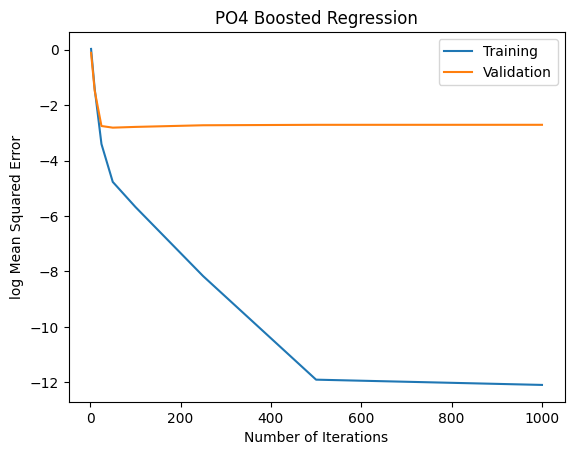

In [188]:
po4it_error_m = po4it_error.melt('Iterations', var_name='Data set', value_name='mse')
mse_pl = sns.lineplot(x=po4it_error['Iterations'], y=np.log(po4it_error['Training MSE']), label = 'Training')
mse_pl = sns.lineplot(x=po4it_error['Iterations'], y=np.log(po4it_error['Validation MSE']), label = 'Validation')

mse_pl.set(xlabel='Number of Iterations', ylabel='log Mean Squared Error')
mse_pl.set_title('PO4 Boosted Regression')

plt.savefig('iteration_train+val_p.png', bbox_inches='tight', dpi=300)

<Figure size 800x600 with 0 Axes>

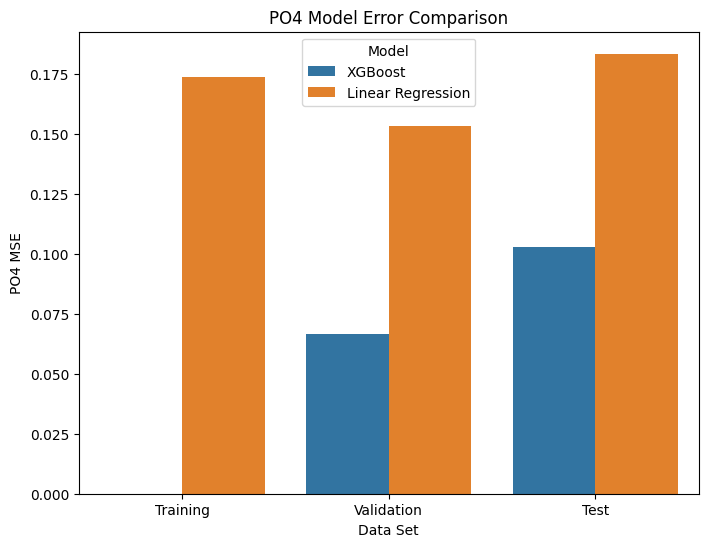

In [189]:
#running boosted regression
po4bst = XGBRegressor(n_estimators=50, learning_rate=0.1) 
po4bst = bst.fit(X_train, y_p_train)

po4bst_ypred_test = po4bst.predict(X_test)
po4bst_ypred_train = po4bst.predict(X_train)
po4bst_ypred_val = po4bst.predict(X_val)

po4bst_mse_test = mean_squared_error(po4bst_ypred_test, y_p_test)
po4bst_mse_train = mean_squared_error(po4bst_ypred_train, y_p_train)
po4bst_mse_val = mean_squared_error(po4bst_ypred_val, y_p_val)


#testing against baseline linear regression
po4reg = linear_model.LinearRegression()
po4reg.fit(X_train, y_p_train)

po4reg_ypred_test = po4reg.predict(X_test)
po4reg_ypred_train = po4reg.predict(X_train)
po4reg_ypred_val = po4reg.predict(X_val)

po4reg_mse_test = mean_squared_error(po4reg_ypred_test, y_p_test)
po4reg_mse_train = mean_squared_error(po4reg_ypred_train, y_p_train)
po4reg_mse_val = mean_squared_error(po4reg_ypred_val, y_p_val)

data = {
    'Category': ['Training', 'Validation', 'Test'],
    'XGBoost': [po4bst_mse_train, po4bst_mse_val, po4bst_mse_test],
    'Linear Regression': [po4reg_mse_train, po4reg_mse_val, po4reg_mse_test]
}
df = pd.DataFrame(data)

# Melt the DataFrame to long format
melted_df = df.melt(id_vars='Category', var_name='Model', value_name='PO4 MSE')

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.figure(figsize=(8, 6))
p_bstvreg_bar = sns.barplot(x='Category', y='PO4 MSE', hue='Model', data=melted_df)
p_bstvreg_bar.set(xlabel='Data Set', ylabel='PO4 MSE')
p_bstvreg_bar.set_title('PO4 Model Error Comparison')

plt.savefig('bar_mse_po4.png', bbox_inches='tight', dpi=300)

In [190]:
print([po4bst_mse_test, po4bst_mse_train, po4bst_mse_val, po4reg_mse_test, po4reg_mse_train, po4reg_mse_val])

[0.10301625559281041, 5.577326311462115e-06, 0.06640868889601682, 0.18347546131050796, 0.17371969815005606, 0.1534311939298884]


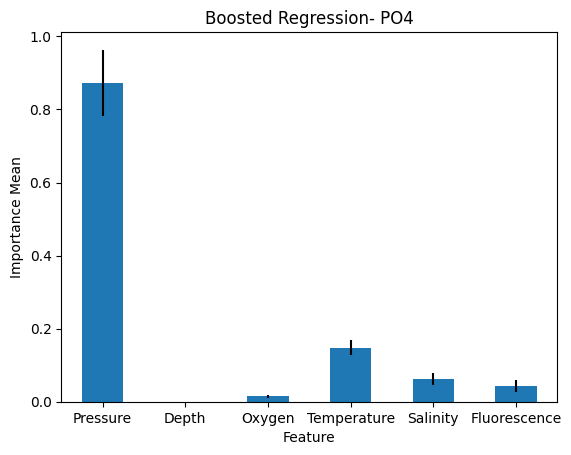

In [191]:
r_po4bst = permutation_importance(po4bst, X_test, y_p_test, n_repeats=10, random_state=0)

imp_means_po4bst = pd.DataFrame(np.hstack((r_po4bst.importances_mean)), columns = ['mean'])
imp_std_po4bst = pd.DataFrame(np.hstack((r_po4bst.importances_std)), columns = ['std'])

feature_imp_po4bst = [featuresdf, imp_means_po4bst, imp_std_po4bst]
po4bst_imp_df = feature_imp_po4bst[0].join(feature_imp_po4bst[1:])

po4bst_ax = po4bst_imp_df.plot(kind='bar', x='feature', y='mean', yerr='std', rot=0)
po4bst_ax.set(xlabel='Feature', ylabel='Importance Mean')
po4bst_ax.legend_.remove()
po4bst_ax.set_title('Boosted Regression- PO4')
plt.savefig('bst_impt_p.png', bbox_inches='tight', dpi=300)

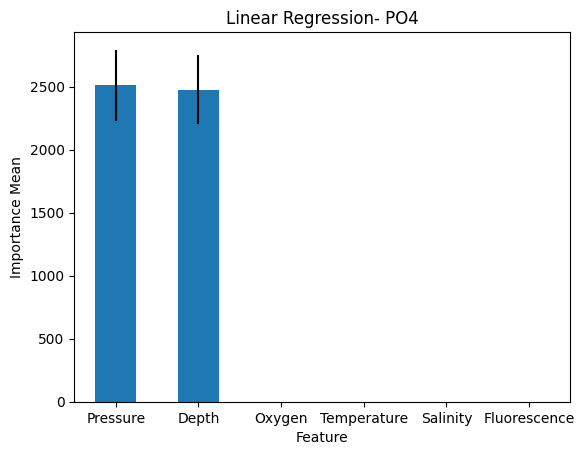

In [192]:
r_po4reg = permutation_importance(po4reg, X_test, y_n_test, n_repeats=10, random_state=0)

imp_means_po4reg = pd.DataFrame(np.hstack((r_po4reg.importances_mean)), columns = ['mean'])
imp_std_po4reg = pd.DataFrame(np.hstack((r_po4reg.importances_std)), columns = ['std'])

feature_imp_po4reg = [featuresdf, imp_means_po4reg, imp_std_po4reg]
po4reg_imp_df = feature_imp_po4reg[0].join(feature_imp_po4reg[1:])

po4reg_ax = po4reg_imp_df.plot(kind='bar', x='feature', y='mean', yerr='std', rot=0)
po4reg_ax.set(xlabel='Feature', ylabel='Importance Mean')
po4reg_ax.legend_.remove()
po4reg_ax.set_title('Linear Regression- PO4')

plt.savefig('reg_impt_p.png', bbox_inches='tight', dpi=300)

In [216]:
#PO4 prediction for just sep2000
#trying just interpolation w/ 5m depth increments
depth_inc = np.arange(0, 500, 5).tolist() #max CTD_btl depth = 500

# Interpolate concentrations for each desired depth (used ChatGPT for help)
interpolated_concentrations = {} #empty data frame
for param in btl_nut_nona.columns[1:]:  # Exclude the 'Depth' column
    interpolated_concentrations['po4_int'] = np.interp(depth_inc, sep2000_bottle['DepSM'], sep2000_bottle['po4'])

# Create a new DataFrame to store interpolated concentrations
sep2000_int_p = pd.DataFrame(interpolated_concentrations)
sep2000_int_p['DepSM'] = depth_inc  # Add depth values to the DataFrame

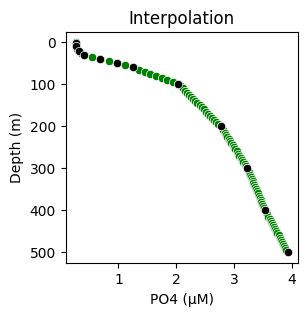

In [217]:
plt.figure(figsize=(3, 3))
sep2000_int_p = sns.scatterplot(data=sep2000_int_p, x="po4_int", y="DepSM", color = "green", legend =False)
sep2000_int_p = sns.scatterplot(data=sep2000_bottle,  x="po4", y="DepSM", color='black')
sep2000_int_p.set(xlabel='PO4 (µM)', ylabel='Depth (m)')
sep2000_int_p.invert_yaxis()
sep2000_int_p.set_title('Interpolation')

plt.savefig('sep2000_p_impt.png', bbox_inches='tight', dpi=300)


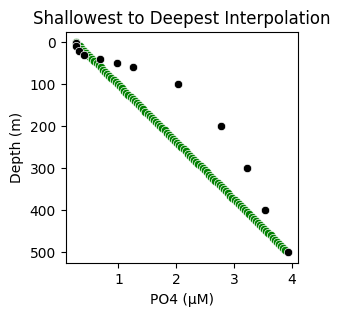

In [223]:
#Interpolating just from surface to deepest 
interpolated_concentrations = {} #empty data frame
for param in btl_nut_nona.columns[1:]:  # Exclude the 'Depth' column
    interpolated_concentrations['po4_int_sd'] = np.interp(depth_inc, [shallowest_sample['DepSM'], deepest_sample['DepSM']], [shallowest_sample['po4'], deepest_sample['po4']])

# Create a new DataFrame to store interpolated concentrations
sep2000_int_po4_sd = pd.DataFrame(interpolated_concentrations)
sep2000_int_po4_sd['DepSM'] = depth_inc  # Add depth values to the DataFrame

plt.figure(figsize=(3, 3))
sep2000_int_po4_sd_p = sns.scatterplot(data=sep2000_int_po4_sd, x="po4_int_sd", y="DepSM", color = 'green', legend =False)
sep2000_int_po4_sd_p = sns.scatterplot(data=sep2000_bottle,  x="po4", y="DepSM", color='black')
sep2000_int_po4_sd_p.set(xlabel='PO4 (µM)', ylabel='Depth (m)')
sep2000_int_po4_sd_p.invert_yaxis()
sep2000_int_po4_sd_p.set_title('Shallowest to Deepest Interpolation')

plt.savefig('sep2000_p_sd_impt.png', bbox_inches='tight', dpi=300)

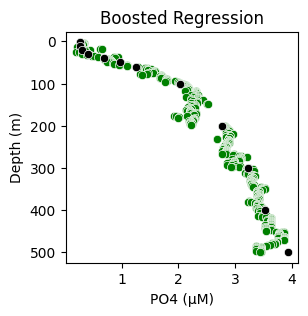

In [219]:
p_pred_bst = po4bst.predict(X_sep2000)
p_pred_bst_df = pd.DataFrame(p_pred_bst, columns =['po4_bst'])

plt.figure(figsize=(3, 3))
sep2000_ppred_bst = pd.concat([sep2000, p_pred_bst_df], axis=1)
sep2000_bst_pred_p = sns.scatterplot(data=sep2000_ppred_bst, x="po4_bst", y="DepSM", color = 'green', legend =False)
sep2000_bst_pred_p = sns.scatterplot(data=sep2000_bottle,  x="po4", y="DepSM", color='black')
sep2000_bst_pred_p.set(xlabel='PO4 (µM)', ylabel='Depth (m)')
sep2000_bst_pred_p.invert_yaxis()
sep2000_bst_pred_p.set_title('Boosted Regression')
plt.savefig('sep2000_p_bst.png', bbox_inches='tight', dpi=300)

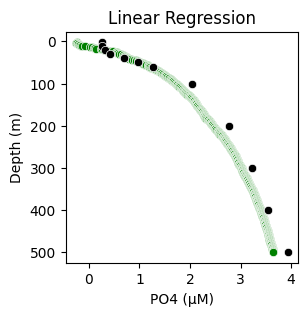

In [220]:
p_pred_reg = po4reg.predict(X_sep2000)
p_pred_reg_df = pd.DataFrame(p_pred_reg, columns =['po4_reg'])

plt.figure(figsize=(3, 3))
sep2000_ppred_reg = pd.concat([sep2000, p_pred_reg_df], axis=1)
sep2000_reg_pred_p = sns.scatterplot(data=sep2000_ppred_reg, x="po4_reg", y="DepSM", color = 'green', legend = False)
sep2000_reg_pred_p = sns.scatterplot(data=sep2000_bottle,  x="po4", y="DepSM", color='black')
sep2000_reg_pred_p.set(xlabel='PO4 (µM)', ylabel='Depth (m)')
sep2000_reg_pred_p.invert_yaxis()
sep2000_reg_pred_p.set_title('Linear Regression')
plt.savefig('sep2000_p_reg.png', bbox_inches='tight', dpi=300)

In [224]:
sep2000_bst_p = pd.merge(sep2000_bottle, sep2000_ppred_bst, on=['DepSM'])
sep2000_reg_p = pd.merge(sep2000_bottle, sep2000_ppred_reg, on=['DepSM'])
#sep2000_int = pd.merge(sep2000_bottle, sep2000_int_no3, on=['DepSM'])
sep2000_int_p_sd = pd.merge(sep2000_bottle, sep2000_int_po4_sd, on=['DepSM'])

sep2000_mse_bst_p = mean_squared_error(sep2000_bst_p['po4'], sep2000_bst_p['po4_bst'])
sep2000_mse_reg_p = mean_squared_error(sep2000_reg_p['po4'], sep2000_reg_p['po4_reg'])
sep2000_mse_int_p_sd = mean_squared_error(sep2000_int_p_sd['po4'], sep2000_int_p_sd['po4_int_sd'])


print(sep2000_mse_bst_p, sep2000_mse_reg_p, sep2000_mse_int_p_sd)

0.02537841922503085 0.06988899264429328 0.3379808782116417


In [ ]:
## PREDICTING SI FROM ALL CTD CASTS- dont need for presentation or project?

In [377]:
#CTD_use_nona is our working CTD data file 
X_sio3 = CTD_use_nona[["PrDM", "DepSM", "OxML/L", "T090C", "Sal00", "Fluor"]].to_numpy()
sio3_pred_bst = bst.predict(X_sio3)
sio3_pred_bst_df = pd.DataFrame(sio3_pred_bst, columns =['sio3'])
#sio3_pred_bst_df.describe()

In [378]:
sio3_pred_reg = reg.predict(X_sio3)
sio3_pred_reg_df = pd.DataFrame(sio3_pred_reg, columns =['sio3'])
#sio3_pred_reg_df.describe()

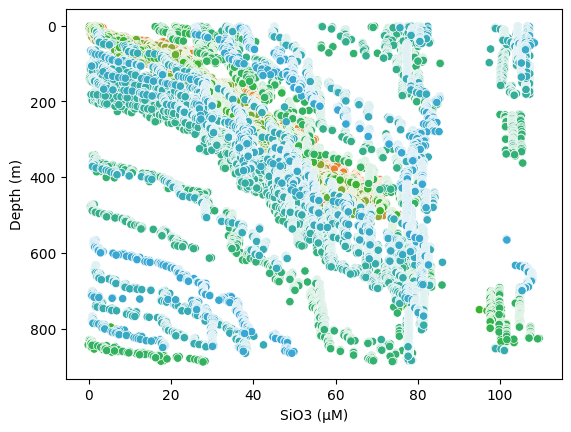

In [379]:
CTD_sipred_bst = pd.concat([CTD_use_nona, sio3_pred_bst_df], axis=1)
bst_pred_sio3 = sns.scatterplot(data=CTD_sipred_bst, x="sio3", y="DepSM", hue='cruise date', legend =False)
bst_pred_sio3.set(xlabel='SiO3 (µM)', ylabel='Depth (m)')
bst_pred_sio3.invert_yaxis()

In [380]:
CTD_sipred_bst.describe()

,PrDM,DepSM,OxML/L,T090C,Sal00,Fluor,sio3
count,49522.000000,49522.000000,49522.000000,49522.000000,49522.000000,49522.000000,49522.000000
mean,362.973691,359.958746,1.282988,8.237656,34.044214,0.236910,53.119259
std,227.125074,225.078205,1.392828,2.503426,1.092450,0.459901,26.760347
min,1.007000,1.000000,0.000010,1.848800,2.621600,0.000000,-0.113547
25%,172.294000,171.000000,0.235177,6.418650,34.100900,0.043956,33.234734
50%,344.732000,342.000000,0.800530,7.883700,34.258100,0.066637,52.590931
75%,525.390000,521.000000,1.818780,9.447500,34.319700,0.288375,77.317444
max,896.279000,888.000000,15.451000,21.477900,57.402300,8.522100,112.799591


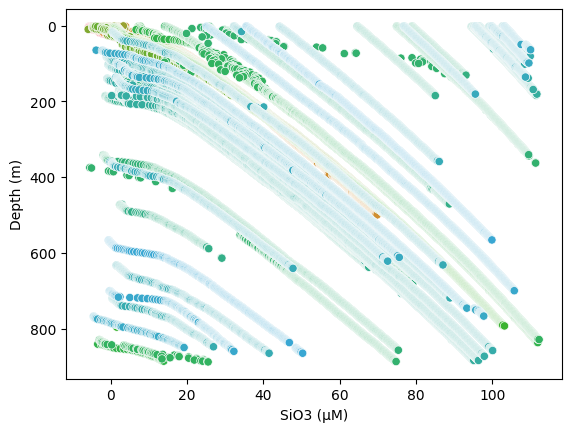

In [381]:
CTD_sipred_reg = pd.concat([CTD_use_nona, sio3_pred_reg_df], axis=1)
reg_pred_sio3 = sns.scatterplot(data=CTD_sipred_reg, x="sio3", y="DepSM", hue='cruise date', legend =False)
reg_pred_sio3.set(xlabel='SiO3 (µM)', ylabel='Depth (m)')
reg_pred_sio3.invert_yaxis()

In [382]:
#trying just interpolation w/ 5m depth increments
depth_inc = np.arange(0, 890, 5).tolist() #max CTD_btl depth = 885

# Interpolate concentrations for each desired depth (used ChatGPT for help)
interpolated_concentrations = {} #empty data frame
for param in btl_nut_nona.columns[1:]:  # Exclude the 'Depth' column
    interpolated_concentrations['sio3_int'] = np.interp(depth_inc, btl_nut_nona['DepSM'], btl_nut_nona['sio3'])

# Create a new DataFrame to store interpolated concentrations
interpolated_si = pd.DataFrame(interpolated_concentrations)
interpolated_si['DepSM'] = depth_inc  # Add depth values to the DataFrame

print(interpolated_si)

       sio3_int  DepSM
0      6.500000      0
1      7.153333      5
2      8.242222     10
3      9.331111     15
4     10.420000     20
..          ...    ...
173  108.484444    865
174  108.693333    870
175  108.902222    875
176  109.111111    880
177  109.320000    885

[178 rows x 2 columns]


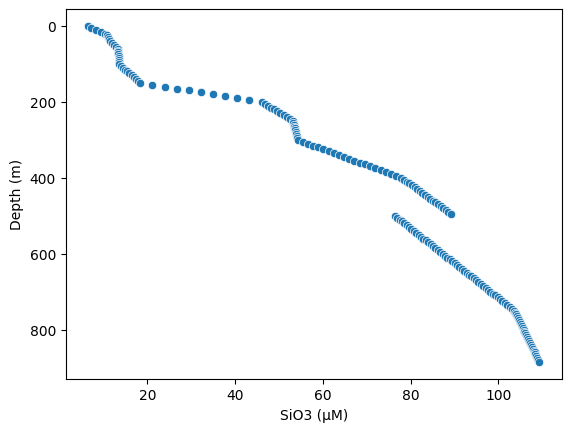

In [383]:
int_sio3 = sns.scatterplot(data=interpolated_si, x="sio3_int", y="DepSM", legend =False)
int_sio3.set(xlabel='SiO3 (µM)', ylabel='Depth (m)')
int_sio3.invert_yaxis()

In [806]:
pip install gsw

  Obtaining dependency information for gsw from https://files.pythonhosted.org/packages/e7/68/1546aa950f4e01279110f338cbf7cce638e9a0280153d6ee22dee0d4842c/gsw-3.6.17.post1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 2.6 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


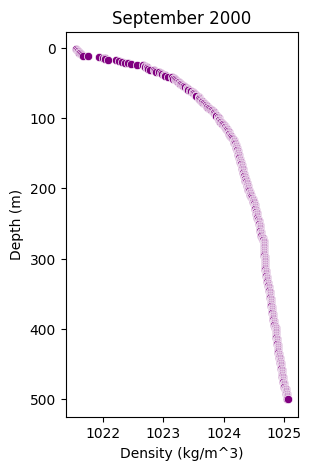

In [810]:
#converting salinity and temperature profiles into density (chatgpt)
def seawater_density(T, S, depth):
    # Constants
    rho_0 = 1027  # Reference seawater density at standard conditions (kg/m^3)
    alpha = 0.0002  # Coefficient of thermal expansion of seawater (/°C)
    beta = 0.78e-3  # Haline contraction coefficient (/g/kg)
    T0 = 0  # Reference temperature (°C)
    S0 = 35  # Reference salinity (g/kg)

    # Calculate density
    rho = rho_0 * (1 - alpha * (T - T0) + beta * (S - S0))

    return rho

temp = sep2000["T090C"].to_numpy()
sal = sep2000["Sal00"].to_numpy()
depth = sep2000["DepSM"].to_numpy()


# Calculate density profile
density = seawater_density(temp, sal, depth)


# Plot density profile
plt.figure(figsize=(3, 5))

sep2000_den = sns.scatterplot(x=density, y=depth, color='purple')
sep2000_den.set(xlabel='Density (kg/m^3)', ylabel='Depth (m)')
sep2000_den.invert_yaxis()
shttps://www.bonappetit.com/recipe/three-cup-chicken-noodles?utm_campaign=cm&utm_source=crm&utm_brand=ba&utm_mailing=BA_SubPersRec_1_093021&utm_medium=email&bxid=5dc094b93f92a435a21a60d7&cndid=58226228&hasha=7d9386ef79ec75c15616f9d2d822edd1&hashb=86dfc185ad40bd4212e1cc701f01c72da4eb4575&hashc=7db35561b65c0c8d99411785ae588455c6c3e3d91e62e9569eea07246f8b3844&utm_term=BNA_PersRec_CYGNUShttps://www.bonappetit.com/recipe/three-cup-chicken-noodles?utm_campaign=cm&utm_source=crm&utm_brand=ba&utm_mailing=BA_SubPersRec_1_093021&utm_medium=email&bxid=5dc094b93f92a435a21a60d7&cndid=58226228&hasha=7d9386ef79ec75c15616f9d2d822edd1&hashb=86dfc185ad40bd4212e1cc701f01c72da4eb4575&hashc=7db35561b65c0c8d99411785ae588455c6c3e3d91e62e9569eea07246f8b3844&utm_term=BNA_PersRec_CYGNUSep2000_den.set_title('September 2000')

plt.savefig('sep2000_density.png', dpi=300)




In [710]:
density

array([1021.55595311, 1021.56848251, 1021.57918179, 1021.58425723,
       1021.59473263, 1021.60900176, 1021.6162113 , 1021.62857638,
       1021.65692569, 1021.67530488, 1021.7517486 , 1021.92818309,
       1021.99213644, 1022.02693941, 1022.03967627, 1022.07641822,
       1022.21489274, 1022.26469608, 1022.31796657, 1022.35701105,
       1022.40713481, 1022.45598304, 1022.56472796, 1022.66186984,
       1022.6946599 , 1022.68732917, 1022.72564859, 1022.72973195,
       1022.75048556, 1022.77516437, 1022.84364473, 1022.85841505,
       1022.87704072, 1022.93161344, 1022.96657663, 1022.96747628,
       1023.0094621 , 1023.01713995, 1023.03324536, 1023.07321415,
       1023.13758856, 1023.16676974, 1023.14947095, 1023.19749758,
       1023.21001671, 1023.22240233, 1023.24006468, 1023.25375253,
       1023.2694985 , 1023.28019368, 1023.29821342, 1023.3119937 ,
       1023.32494623, 1023.34240523, 1023.35241026, 1023.38822586,
       1023.39737438, 1023.40081893, 1023.40778816, 1023.43206